In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
from scipy.ndimage import median_filter
import sys
import os
import struct
import pywt
import concurrent.futures
import glob
from windrose import WindroseAxes


sys.path.append(os.path.join(os.getcwd(), 'EC'))
sys.path.append(os.path.join(os.getcwd(), 'plotting'))
sys.path.append(os.path.join(os.getcwd(), 'MO'))
sys.path.append(os.path.join(os.getcwd(), 'SPC'))

import constants
import Func_read_data
import Func_despike_data
import sensor_info
import Func_DR
import Func_MRFD
import Funcs_plots
import normalize
import Func_MO

importlib.reload(Func_read_data)
importlib.reload(Func_despike_data)
importlib.reload(constants)
importlib.reload(sensor_info)
importlib.reload(Func_DR)
importlib.reload(Func_MRFD)
importlib.reload(Funcs_plots)
importlib.reload(normalize)
importlib.reload(Func_MO)

from Func_read_data import *
from constants import *
from Func_despike_data import *
from sensor_info import *
from Func_MRFD import *
from Func_DR import *
from Funcs_plots import *
from normalize import *
from Func_MO import *

In [3]:
# folder = '/home/engbers/Documents/PhD/EC_data_convert/converted/'
# sensor = 'SFC'
# start = '2024-01-01 00:00'
# end = '2025-03-01 00:00'
# output_folder = '/home/engbers/Documents/PhD/EC_data_convert/SFC/202404'

# # GET SENSOR INFO
# plim, calibration_coefficients, heights = get_sensor_info(sensor, 2024)
# slowdata = read_data(folder, 'slow', sensor, start, end, plot_data=False)

# file_numbers_array = [i for i in range(502, 498, 6)]

# def process_batch(file_number):
#     file_numbers = np.arange(file_number, file_number + 8).astype(int).astype(str)
#     print(f"Processing files: {file_numbers}")
    
#     fastdata_SFC = read_data(folder, 'fast', sensor, start, end, file_numbers=file_numbers)
    
#     despiked_fastdata = despike_fast_MAD(
#         fastdata_SFC, slowdata, plim, sensor,
#         calibration_coefficients=calibration_coefficients,
#         plot_despike=False  # Set False if running parallel headless
#     )
    
#     # save_despiked_data(fastdata_SFC, despiked_fastdata, output_folder, sensor)
#     # return f"Finished {file_number}"

# # Run in parallel
# with concurrent.futures.ProcessPoolExecutor(max_workers=4) as executor:
#     results = list(tqdm(executor.map(process_batch, file_numbers_array), total=len(file_numbers_array)))
# print(results)

In [3]:
"""READ IN EDDYPRO FILES"""
folder='/home/engbers/Documents/PhD/EC_data_convert/'

sensor='SFC_DR'
fluxes_SFC = read_eddypro_data(folder, sensor)
fluxes_SFC_qc = read_eddypro_data(folder, sensor, qc=True)
sensor='CSAT_16m_DR'
fluxes_16m = read_eddypro_data(folder, sensor)
fluxes_16m_qc = read_eddypro_data(folder, sensor, qc=True)
sensor='CSAT_26m_DR'
fluxes_26m_qc = read_eddypro_data(folder, sensor, qc=True)
fluxes_26m = read_eddypro_data(folder, sensor)


Files found: ['/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202405/eddypro_May2024_full_output_2025-05-22T145422_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202408/eddypro_Aug2024_full_output_2025-05-23T090214_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202412/eddypro_Dec2024_full_output_2025-05-23T123929_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202407/eddypro_Jul2024_full_output_2025-05-22T164622_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202401/eddypro_SFC_Jan2024_full_output_2025-05-21T184431_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202404/eddypro_Apr2024_full_output_2025-05-22T135551_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202409/eddypro_Sep2024_full_output_2025-05-23T102118_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/20241

/home/engbers/Documents/Github/DataProcessingScripts/Func_read_data.py:425: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  [pd.read_csv(file, header=1) for file in files],
/home/engbers/Documents/Github/DataProcessingScripts/Func_read_data.py:425: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  [pd.read_csv(file, header=1) for file in files],
/home/engbers/Documents/Github/DataProcessingScripts/F

Files found: ['/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202405/eddypro_May2024_qc_details_2025-05-22T145422_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202408/eddypro_Aug2024_qc_details_2025-05-23T090214_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202412/eddypro_Dec2024_qc_details_2025-05-23T123929_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202407/eddypro_Jul2024_qc_details_2025-05-22T164622_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202401/eddypro_SFC_Jan2024_qc_details_2025-05-21T184431_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202404/eddypro_Apr2024_qc_details_2025-05-22T135551_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202409/eddypro_Sep2024_qc_details_2025-05-23T102118_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202411/eddyp

Using 2024 calibration coefficients
{'A': 4820.04, 'B': 3792900.0, 'C': -115477000.0, 'H2O_Zero': 0.7087, 'H20_Span': 0.9885}
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240118_SFC
TOA5_STN1OneMin_403_2023_12_31_1506.dat
TOA5_STN1OneMin_404_2024_01_01_1506.dat
TOA5_STN1OneMin_405_2024_01_02_1506.dat
TOA5_STN1OneMin_406_2024_01_03_1506.dat
TOA5_STN1OneMin_407_2024_01_04_1506.dat
TOA5_STN1OneMin_408_2024_01_05_1506.dat
TOA5_STN1OneMin_409_2024_01_06_1506.dat
TOA5_STN1OneMin_410_2024_01_07_1506.dat
TOA5_STN1OneMin_411_2024_01_08_1506.dat
TOA5_STN1OneMin_412_2024_01_09_1506.dat
TOA5_STN1OneMin_413_2024_01_10_1506.dat
TOA5_STN1OneMin_414_2024_01_11_1506.dat
TOA5_STN1OneMin_415_2024_01_12_1506.dat
TOA5_STN1OneMin_416_2024_01_13_1506.dat
TOA5_STN1OneMin_417_2024_01_14_1506.dat
TOA5_STN1OneMin_418_2024_01_15_1506.dat
TOA5_STN1OneMin_419_2024_01_16_1506.dat
TOA5_STN1OneMin_420_2024_01_17_1506.dat
Reading data from /home/engbers/Documents/PhD/EC_data_convert/convert

/home/engbers/Documents/Github/DataProcessingScripts/Func_read_data.py:287: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f'./plots/{sensor}_{start}_slowdata.png', bbox_inches='tight')


(<Figure size 1300x1400 with 7 Axes>,
 array([<Axes: ylabel='Temperature [oC]'>, <Axes: ylabel='RH wrt ice [%]'>,
        <Axes: ylabel='Wind Direction'>, <Axes: ylabel='Wind Speed[ms-1]'>,
        <Axes: ylabel='Net Radiation [Wm-2]'>,
        <Axes: ylabel='Net Radiation [Wm-2]'>,
        <Axes: ylabel='Flowcapt [g/m2/s]'>], dtype=object))

/home/engbers/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


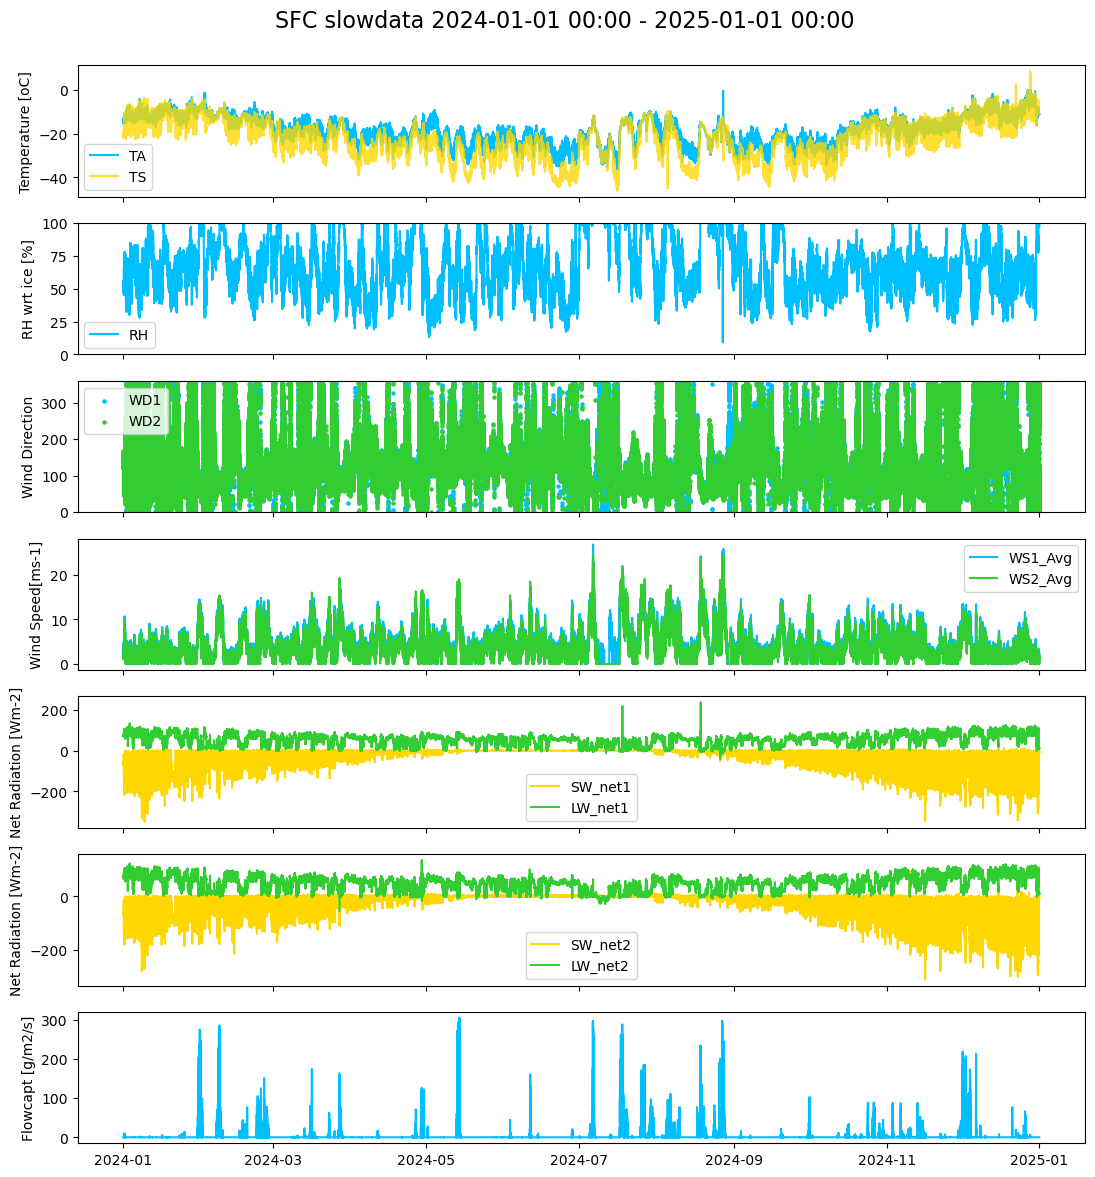

In [4]:
"""READ AND CLEAN SLOWDATA"""
folder='/run/user/72637/gvfs/smb-share:server=memobi.wsl.ch,share=pub/Turbulence/PEA/Season_2024-2025/DATA/MET/converted/'
folder='/home/engbers/Documents/PhD/EC_data_convert/converted/'
sensor='SFC'
start='2024-01-01 00:00'
end='2025-01-01 00:00'

"""GET SENSOR INFO"""
plim, calibration_coefficients, heights = get_sensor_info(sensor, 2024)

"""READ FAST AND SLOW DATA from folder"""
slowdata=read_data(folder, 'slow', sensor, start, end, plot_data=False)

"""CLEAN SLOWDATA"""
slowdata_cleaned=clean_slowdata(slowdata)
plot_SFC_slowdata(slowdata_cleaned, sensor, start, end)




In [16]:
"""PROCESS SPC SCRIPTS AND SAVE TO ONE MINUTE FILES"""
SPC_folder = '/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed'
SPC_filenames = []
SPC_all = pd.DataFrame()
file_list = sorted(glob.glob(os.path.join(SPC_folder, '*.txt')))
batch_size = 25

for i in range(0, len(file_list), batch_size):
    batch_files = file_list[i:i + batch_size]
    # SPC_filenames.append(file)
    print(batch_files)
    SPC = getNormalizedData(batch_files, slowdata_cleaned)
    SPC = SPC.resample('1min').mean()
    SPC.to_csv('/home/engbers/Documents/PhD/EC_data_convert/SPC/SPC_OneMin_processed/'+batch_files[0].split('/')[-1], index=True, sep='\t')
    # SPC_all = pd.concat([SPC_all, SPC], ignore_index=True)



['/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed/U240220_082027Snow-04-1sec-org-0000.txt', '/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed/U240221_000001Snow-04-1sec-org-0000.txt', '/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed/U240222_000001Snow-04-1sec-org-0000.txt', '/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed/U240223_000001Snow-04-1sec-org-0000.txt', '/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed/U240224_000001Snow-04-1sec-org-0000.txt', '/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed/U240224_084612Snow-04-1sec-org-0001.txt', '/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed/U240225_000001Snow-04-1sec-org-0001.txt', '/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed/U240226_000001Snow-04-1sec-org-0001.txt', '/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed/U240227_000001S

In [5]:
"""READ SPC FILES"""
SPC_filenames = []
SPC_folder='/home/engbers/Documents/PhD/EC_data_convert/SPC/SPC_OneMin_processed/'
file_list = sorted(glob.glob(os.path.join(SPC_folder, '*.txt')))
for file in file_list:
    SPC_filenames.append(file)
SPC=getRawData(SPC_filenames)


In [6]:
fluxes_SFC['TI']= np.sqrt(fluxes_SFC['u_var']**2 + fluxes_SFC['v_var']**2 + fluxes_SFC['w_var']**2) / fluxes_SFC['wind_speed']
fluxes_16m['TI']= np.sqrt(fluxes_16m['u_var']**2 + fluxes_16m['v_var']**2 + fluxes_16m['w_var']**2) / fluxes_16m['wind_speed']
fluxes_26m['TI']= np.sqrt(fluxes_26m['u_var']**2 + fluxes_26m['v_var']**2 + fluxes_26m['w_var']**2) / fluxes_26m['wind_speed']
def synchronize_nans_all_columns(*dfs):
    """
    Synchronizes NaN values across multiple DataFrames for all columns based on their timestamps.

    Parameters:
        *dfs: Variable number of pandas DataFrames to synchronize.

    Returns:
        A tuple of DataFrames with synchronized NaN values for all columns.
    """
    # Create a continuous datetime index from start to end with the desired frequency
    for df in dfs:
        df=resample_with_threshold(df, '30min', True, '30min', 80)
    continuous_index = pd.date_range(start=start, end=end, freq='30min')
    
    # Reindex each DataFrame to ensure continuity and fill missing timestamps with NaN
    synced_dfs = [df.reindex(continuous_index) for df in dfs]
    
    # Synchronize NaN values across all columns
    for i, df in enumerate(synced_dfs):
        for col in df.columns:
            for other_df in synced_dfs:
                if col in other_df.columns:
                    df.loc[other_df[col].isna(), col] = np.nan
    
    return tuple(synced_dfs)

# Example usage
fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced = synchronize_nans_all_columns(fluxes_SFC, fluxes_16m, fluxes_26m)

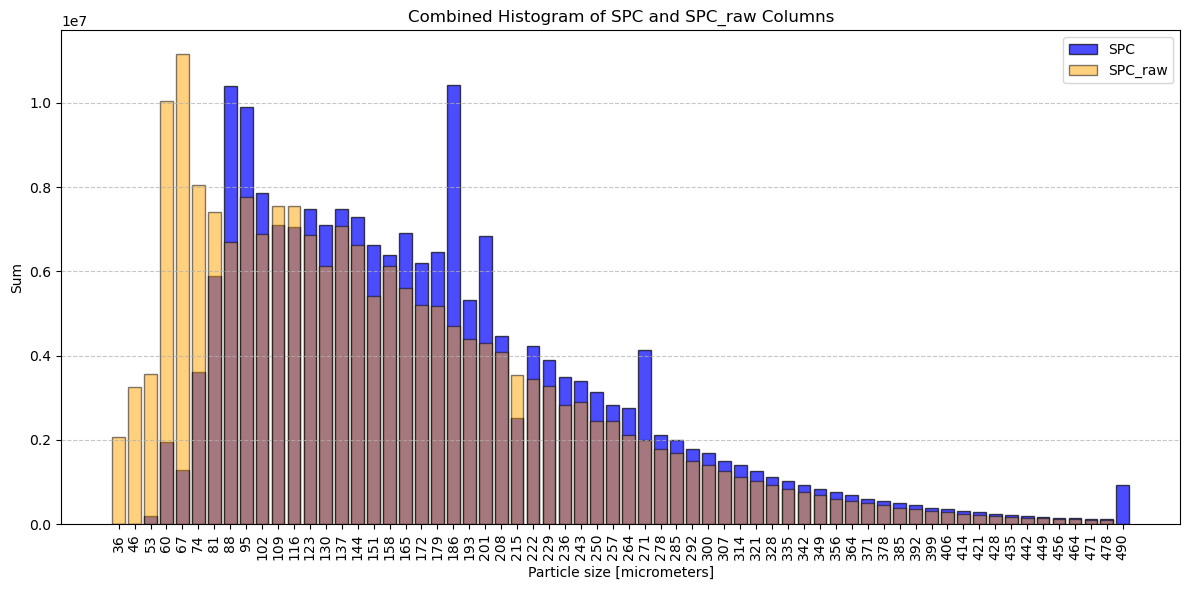

In [ ]:
column_sums_SPC = []
column_sums_SPC_raw = []

# Calculate the sum of all values for each column from index 1 to -2 for SPC
for column in SPC.columns[1:-1]:
    column_sums_SPC.append(SPC[column].sum())

# Calculate the sum of all values for each column from index 1 to -2 for SPC_raw
for column in SPC_raw.columns[2:-1]:
    column_sums_SPC_raw.append(SPC_raw[column].sum())

# Create the combined histogram
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(column_sums_SPC) + 1), column_sums_SPC, color='blue', edgecolor='black', alpha=0.7, label='SPC')
plt.bar(range(1, len(column_sums_SPC_raw) + 1), column_sums_SPC_raw, color='orange', edgecolor='black', alpha=0.5, label='SPC_raw')
plt.title("Combined Histogram of SPC and SPC_raw Columns")
plt.xlabel("Particle size [micrometers]")
plt.ylabel("Sum")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, len(column_sums_SPC) + 1), SPC.columns[1:-1], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

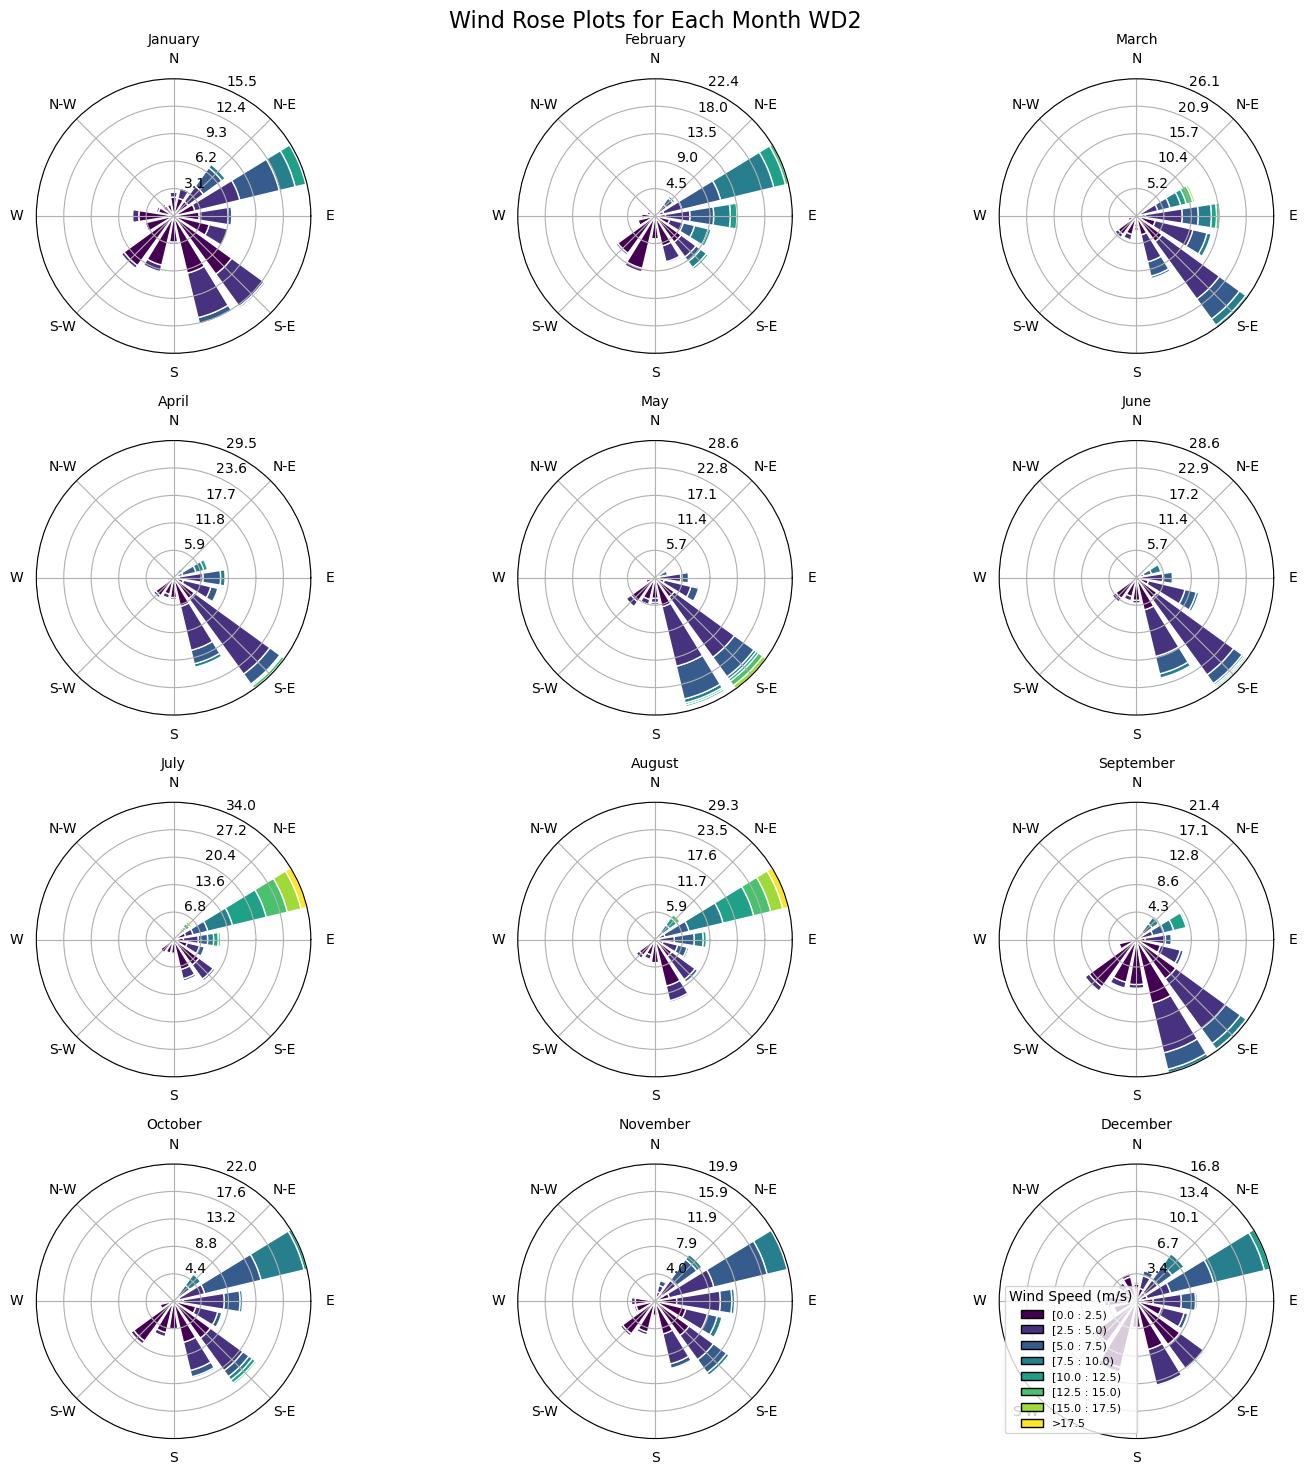

In [ ]:
# Add a new column for the month name
slowdata_cleaned['Month_Name'] = slowdata_cleaned.index.month_name()
# Create a new column for the month
slowdata_cleaned['Month'] = slowdata_cleaned.index.month
# Initialize the figure
fig = plt.figure(figsize=(15, 15))
# Define a consistent color map for wind speed
cmap = plt.cm.viridis
# Loop through each month and create a wind rose
for month in range(1, 13):
    ax = fig.add_subplot(4, 3, month, projection='windrose')
    monthly_data = slowdata_cleaned[slowdata_cleaned['Month'] == month]
    bars = ax.bar(
        monthly_data['WD2'], 
        monthly_data['WS2_Avg'], 
        normed=True, 
        opening=0.8, 
        edgecolor='white', 
        cmap=cmap, 
        bins=np.arange(0, 20, 2.5)  # Set bins with increments of 3 m/s
    )
    ax.set_title(f"{slowdata_cleaned['Month_Name'][slowdata_cleaned['Month'] == month].iloc[0]}", fontsize=10)

# Add legends directly to each subplot
ax.legend(
    loc='lower left', 
    fontsize=8, 
    title="Wind Speed (m/s)"
)
plt.suptitle('Wind Rose Plots for Each Month WD2', fontsize=16, y=0.98)
# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('./plots/WD2_SFC_slowdata_windrose_year.png', bbox_inches='tight', dpi=300)
plt.show()

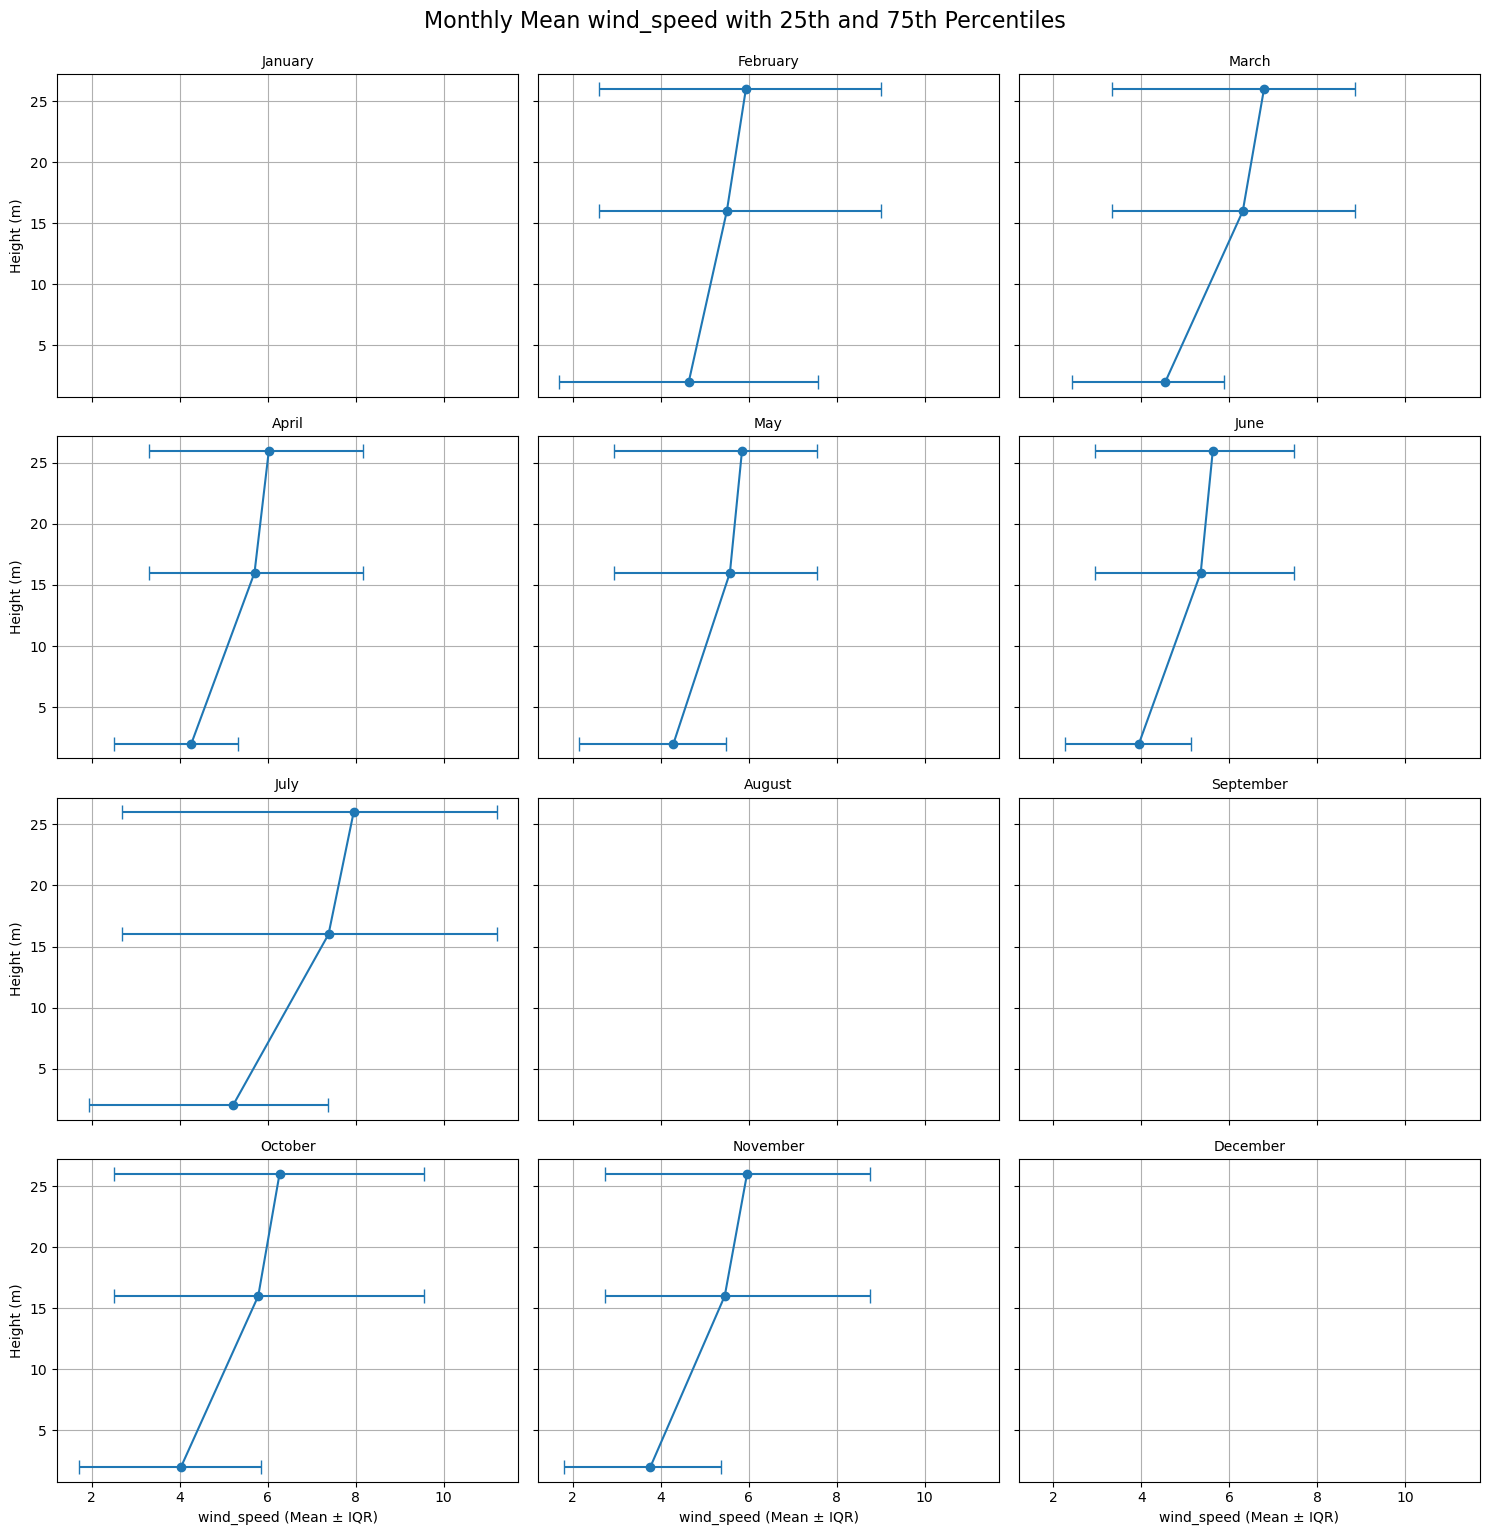

In [196]:
def plot_monthly_mean_H(fluxes_SFC, fluxes_16m, fluxes_26m, heights, variable):
    """
    Plots the monthly mean H with 25th and 75th percentiles for different heights.

    Parameters:
        fluxes_SFC (pd.DataFrame): DataFrame containing SFC flux data.
        fluxes_16m (pd.DataFrame): DataFrame containing 16m flux data.
        fluxes_26m (pd.DataFrame): DataFrame containing 26m flux data.
        heights (list): List of heights corresponding to SFC, 16m, and 26m.
        resample_func (function): Function to resample data with a threshold.
    """
    # Add a 'Month' column to group data by month
    fluxes_SFC['Month'] = fluxes_SFC.index.month
    fluxes_16m['Month'] = fluxes_16m.index.month
    fluxes_26m['Month'] = fluxes_26m.index.month

    # Add a 'Month_Name' column to include the name of the month
    fluxes_SFC['Month_Name'] = fluxes_SFC.index.month_name()
    fluxes_16m['Month_Name'] = fluxes_16m.index.month_name()
    fluxes_26m['Month_Name'] = fluxes_26m.index.month_name()

    # Initialize the figure
    fig, axes = plt.subplots(4, 3, figsize=(15, 15), sharey=True, sharex=True)
    axes = axes.flatten()

    # Loop through each month and create subplots
    for month in range(1, 13):
        ax = axes[month - 1]
        
        # Filter data for the current month
        sfc_month = fluxes_SFC[fluxes_SFC['Month'] == month][variable]
        m16_month = fluxes_16m[fluxes_16m['Month'] == month][variable]
        m26_month = fluxes_26m[fluxes_26m['Month'] == month][variable]
        
        # Calculate mean, 25th, and 75th percentiles
        means = [
            resample_with_threshold(sfc_month, '1ME', True, '30min', 70).mean() if not sfc_month.empty else np.nan, 
            resample_with_threshold(m16_month, '1ME', True, '3h', 70).mean() if not m16_month.empty else np.nan, 
            resample_with_threshold(m26_month, '1ME', True, '3h', 70).mean() if not m26_month.empty else np.nan
        ]
        percentiles_25 = [sfc_month.quantile(0.25), m16_month.quantile(0.25), m16_month.quantile(0.25)]
        percentiles_75 = [sfc_month.quantile(0.75), m26_month.quantile(0.75), m26_month.quantile(0.75)]
        
        # Plot the means with whiskers
        ax.errorbar(
            means, heights, 
            xerr=[np.array(means) - np.array(percentiles_25), np.array(percentiles_75) - np.array(means)], 
            fmt='o-', capsize=5, label='H'
        )
        
        # Set titles and labels
        if not fluxes_SFC['Month_Name'][fluxes_SFC['Month'] == month].empty:
            ax.set_title(f"{fluxes_SFC['Month_Name'][fluxes_SFC['Month'] == month].iloc[0]}", fontsize=10)
        else:
            ax.set_title(f"Month {month}", fontsize=10)
        if month % 3 == 1:  # First column
            ax.set_ylabel("Height (m)")
        if month > 9:  # Last row
            ax.set_xlabel(f"{variable} (Mean ± IQR)")
        ax.grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.suptitle(f"Monthly Mean {variable} with 25th and 75th Percentiles", fontsize=16, y=1.02)
    plt.show()

# Example usage
plot_monthly_mean_H(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, heights=[2, 16, 26], variable='wind_speed')

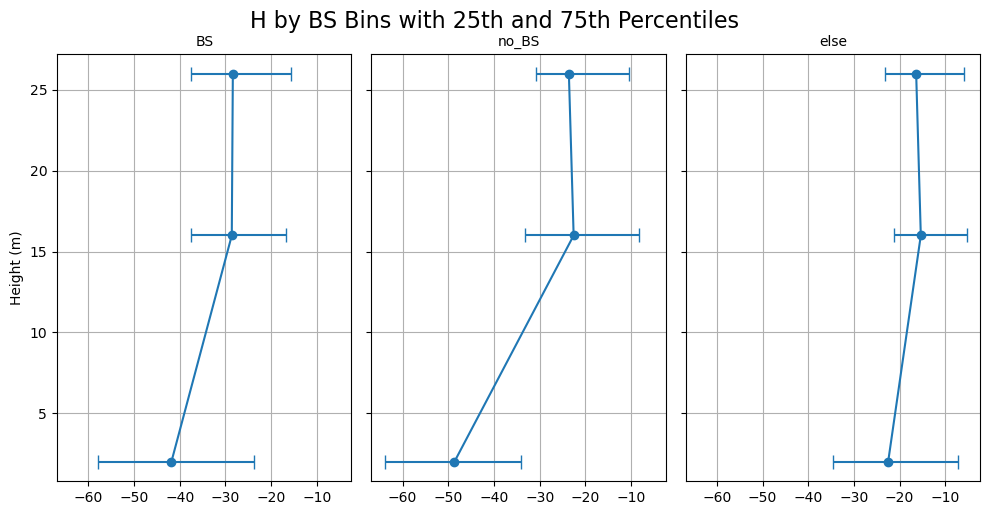

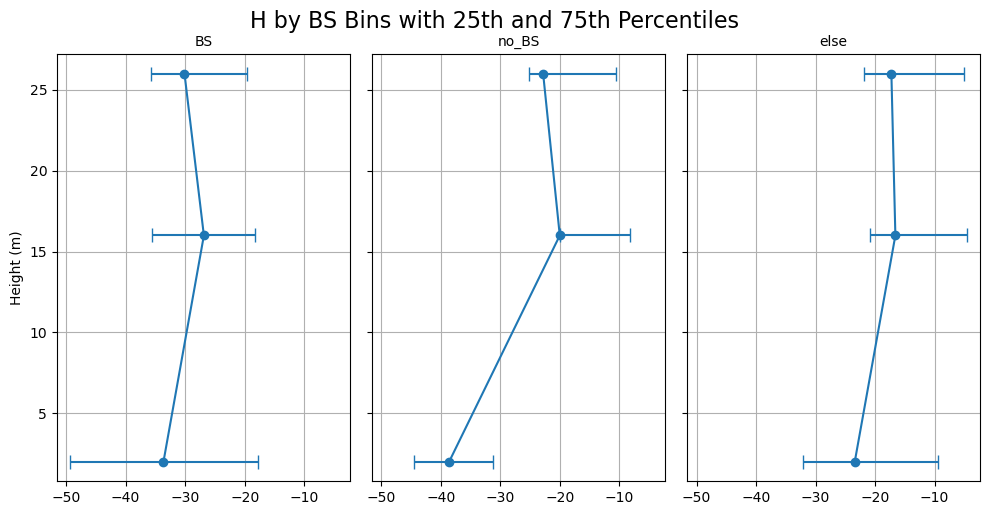

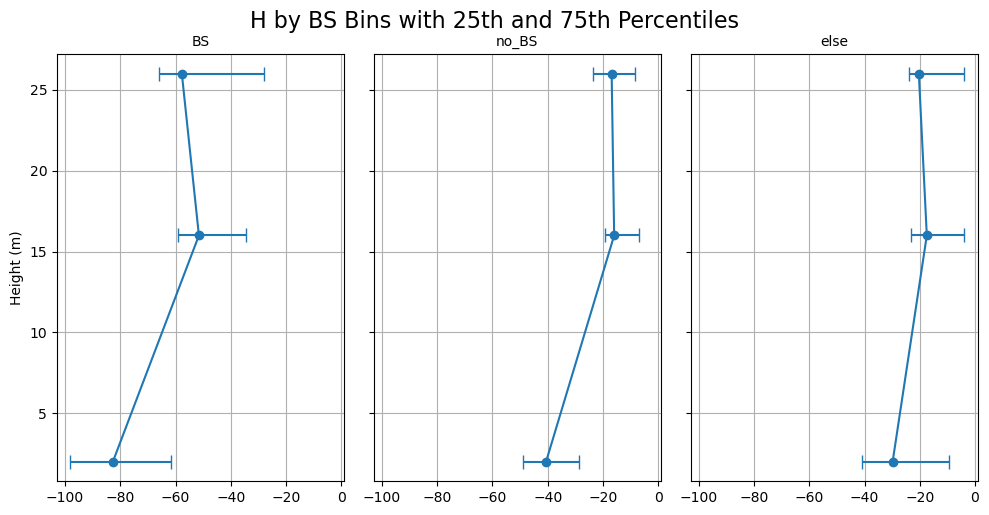

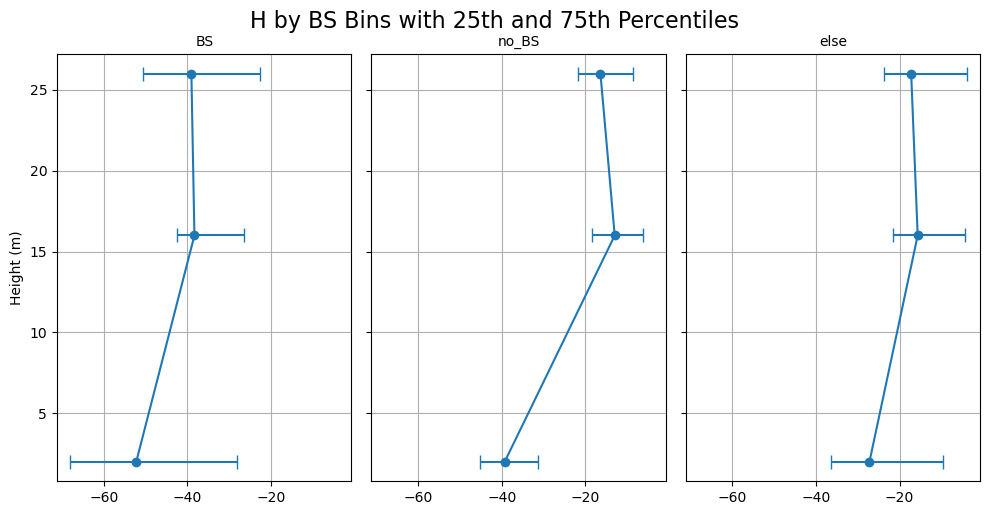

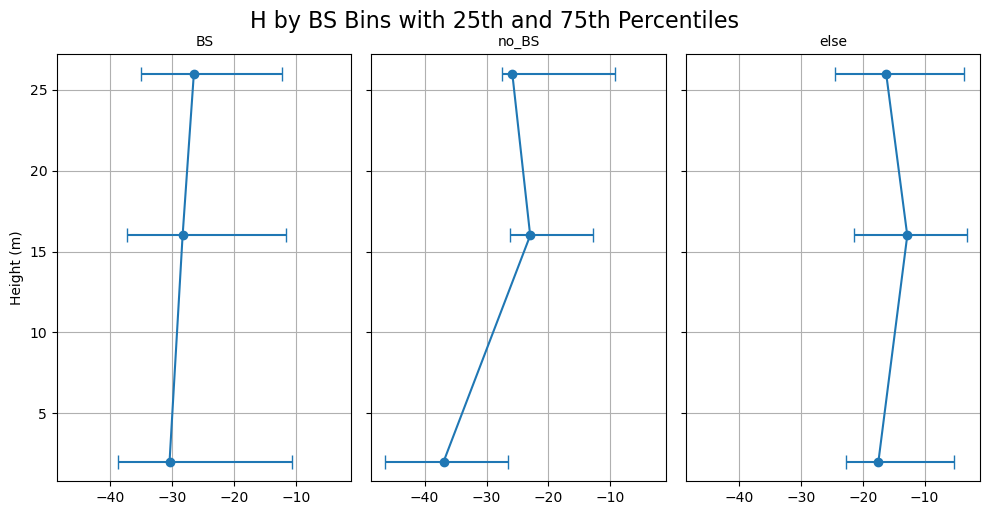

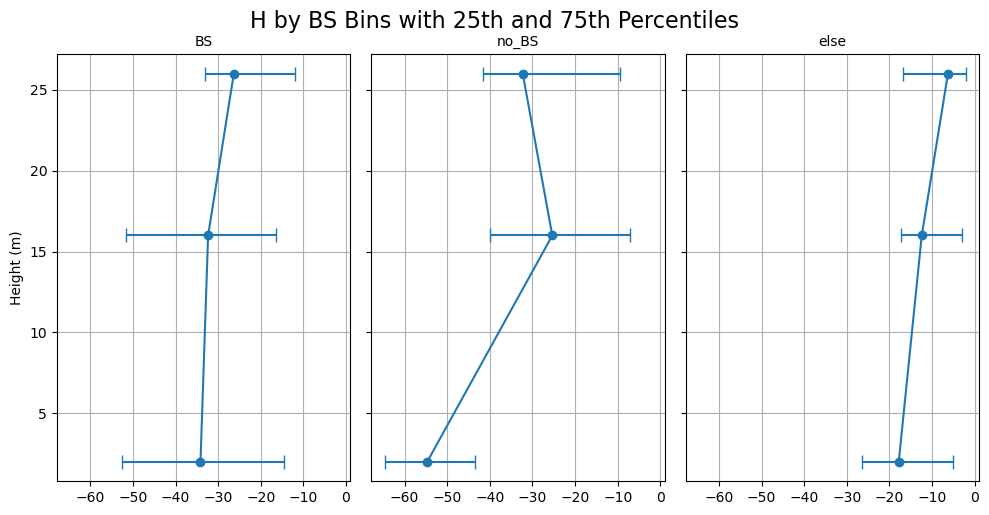

In [92]:
def plot_wind_direction_binned(fluxes_SFC, fluxes_16m, fluxes_26m, slowdata, heights, variable):
    """
    Plots the mean H with 25th and 75th percentiles for different heights, grouped into 9 bins based on wind direction.

    Parameters:
        fluxes_SFC (pd.DataFrame): DataFrame containing SFC flux data.
        fluxes_16m (pd.DataFrame): DataFrame containing 16m flux data.
        fluxes_26m (pd.DataFrame): DataFrame containing 26m flux data.
        slowdata (pd.DataFrame): DataFrame containing wind direction data.
        heights (list): List of heights corresponding to SFC, 16m, and 26m.
        variable (str): The variable to plot.
    """
    # Define wind direction bins (0-360 degrees divided into 9 bins)
    bins = np.linspace(0, 360, 9)
    bin_labels = [f"{int(bins[i])}-{int(bins[i+1])}°" for i in range(len(bins) - 1)]
    slowdata_mean = slowdata.resample('30min').mean()  # Resample slowdata to 30-minute intervals
    slowdata_mean['Wind_Bin'] = pd.cut(slowdata_mean['WD1'], bins=bins, labels=bin_labels, include_lowest=True)

    # Add wind direction bins to flux data
    fluxes_SFC['Wind_Bin'] = slowdata_mean['Wind_Bin']
    fluxes_16m['Wind_Bin'] = slowdata_mean['Wind_Bin']
    fluxes_26m['Wind_Bin'] = slowdata_mean['Wind_Bin']

    # Initialize the figure
    fig, axes = plt.subplots(2, 4, figsize=(15, 10), sharey=True, sharex=True)
    axes = axes.flatten()

    # Loop through each wind direction bin and create subplots
    for i, wind_bin in enumerate(bin_labels):
        ax = axes[i]

        # Filter data for the current wind direction bin
        sfc_bin = fluxes_SFC[fluxes_SFC['Wind_Bin'] == wind_bin][variable]
        m16_bin = fluxes_16m[fluxes_16m['Wind_Bin'] == wind_bin][variable]
        m26_bin = fluxes_26m[fluxes_26m['Wind_Bin'] == wind_bin][variable]
        # Calculate mean, 25th, and 75th percentiles
        means = [
            resample_with_threshold(sfc_bin, '30min', False, '30min', 80).mean() if not sfc_bin.empty else np.nan,
            resample_with_threshold(m16_bin, '30min', False, '30min', 80).mean() if not m16_bin.empty else np.nan,
            resample_with_threshold(m26_bin, '30min', False, '30min', 80).mean() if not m26_bin.empty else np.nan
        ]
        percentiles_25 = [
            resample_with_threshold(sfc_bin, '30min', False, '30min', 80).quantile(0.25) if not sfc_bin.empty else np.nan,
            resample_with_threshold(m16_bin, '30min', False, '30min', 80).quantile(0.25) if not m16_bin.empty else np.nan,
            resample_with_threshold(m26_bin, '30min', False, '30min', 80).quantile(0.25) if not m26_bin.empty else np.nan
        ]
        percentiles_75 = [
            resample_with_threshold(sfc_bin, '30min', False, '30min').quantile(0.75) if not sfc_bin.empty else np.nan,
            resample_with_threshold(m16_bin, '30min', False, '30min', 80).quantile(0.75) if not m16_bin.empty else np.nan,
            resample_with_threshold(m26_bin, '30min', False, '30min', 80).quantile(0.75) if not m26_bin.empty else np.nan
        ]
            # Plot the
        # # Plot the means with whiskers
        # ax.errorbar(
        #     means, heights,
        #     xerr=[np.array(means) - np.array(percentiles_25), np.array(percentiles_75) - np.array(means)],
        #     fmt='o-', capsize=5, label='H'
        # )
        # Ensure error bars are non-negative
        lower_error = np.maximum(0, np.array(means) - np.array(percentiles_25))
        upper_error = np.maximum(0, np.array(percentiles_75) - np.array(means))

        # Plot the means with whiskers
        ax.errorbar(
            means, heights,
            xerr=[lower_error, upper_error],
            fmt='o-', capsize=5, label='H'
        )


        # Set titles and labels
        ax.set_title(f"Wind Bin: {wind_bin}", fontsize=10)
        if i % 4 == 0:  # First column
            ax.set_ylabel("Height (m)")
        if i >= 4:  # Last row
            ax.set_xlabel(f"{variable} (Mean ± IQR)")
        ax.grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.suptitle(f"{variable} by Wind Direction Bins with 25th and 75th Percentiles", fontsize=16, y=1.02)
    plt.savefig(f'./plots/wind_direction_binned_{variable}.png', bbox_inches='tight', dpi=300)
    plt.show()



def plot_wind_speed_binned(fluxes_SFC, fluxes_16m, fluxes_26m, slowdata, heights, variable):
    """
    Plots the mean H with 25th and 75th percentiles for different heights, grouped into bins based on wind speed.

    Parameters:
        fluxes_SFC (pd.DataFrame): DataFrame containing SFC flux data.
        fluxes_16m (pd.DataFrame): DataFrame containing 16m flux data.
        fluxes_26m (pd.DataFrame): DataFrame containing 26m flux data.
        slowdata (pd.DataFrame): DataFrame containing wind speed data.
        heights (list): List of heights corresponding to SFC, 16m, and 26m.
        variable (str): The variable to plot.
    """
    # Define wind speed bins (0-20 m/s in steps of 2.5 m/s)
    bins = np.arange(0, 18, 3)
    bin_labels = [f"{bins[i]}-{bins[i+1]} m/s" for i in range(len(bins) - 1)]
    slowdata_mean = slowdata.resample('30min').mean()  # Resample slowdata to 30-minute intervals

    slowdata_mean['Wind_Speed_Bin'] = pd.cut(slowdata_mean['WS1_Avg'], bins=bins, labels=bin_labels, include_lowest=True)

    # Add wind speed bins to flux data
    fluxes_SFC['Wind_Speed_Bin'] = slowdata_mean['Wind_Speed_Bin']
    fluxes_16m['Wind_Speed_Bin'] = slowdata_mean['Wind_Speed_Bin']
    fluxes_26m['Wind_Speed_Bin'] = slowdata_mean['Wind_Speed_Bin']

    # Initialize the figure
    fig, axes = plt.subplots(1, 5, figsize=(20, 8), sharey=True, sharex=True)
    axes = axes.flatten()

    # Loop through each wind speed bin and create subplots
    for i, wind_bin in enumerate(bin_labels):
        ax = axes[i]

        # Filter data for the current wind speed bin
        sfc_bin = fluxes_SFC[fluxes_SFC['Wind_Speed_Bin'] == wind_bin][variable]
        m16_bin = fluxes_16m[fluxes_16m['Wind_Speed_Bin'] == wind_bin][variable]
        m26_bin = fluxes_26m[fluxes_26m['Wind_Speed_Bin'] == wind_bin][variable]
        # Calculate mean, 25th, and 75th percentiles
        means = [
            resample_with_threshold(sfc_bin, '30min', False, '30min', 80).mean() if not sfc_bin.empty else np.nan,
            resample_with_threshold(m16_bin, '30min', False, '30min', 80).mean() if not m16_bin.empty else np.nan,
            resample_with_threshold(m26_bin, '30min', False, '30min', 80).mean() if not m26_bin.empty else np.nan
        ]
        percentiles_25 = [
            resample_with_threshold(sfc_bin, '30min', False, '30min', 80).quantile(0.25) if not sfc_bin.empty else np.nan,
            resample_with_threshold(m16_bin, '30min', False, '30min', 80).quantile(0.25) if not m16_bin.empty else np.nan,
            resample_with_threshold(m26_bin, '30min', False, '30min', 80).quantile(0.25) if not m26_bin.empty else np.nan
        ]
        percentiles_75 = [
            resample_with_threshold(sfc_bin, '30min', False, '30min', 80).quantile(0.75) if not sfc_bin.empty else np.nan,
            resample_with_threshold(m16_bin, '30min', False, '30min', 80).quantile(0.75) if not m16_bin.empty else np.nan,
            resample_with_threshold(m26_bin, '30min', False, '30min', 80).quantile(0.75) if not m26_bin.empty else np.nan
        ]

        # Ensure error bars are non-negative
        lower_error = np.maximum(0, np.array(means) - np.array(percentiles_25))
        upper_error = np.maximum(0, np.array(percentiles_75) - np.array(means))

        # Plot the means with whiskers
        ax.errorbar(
            means, heights,
            xerr=[lower_error, upper_error],
            fmt='o-', capsize=5, label='H'
        )

        # Set titles and labels
        ax.set_title(f"Wind Speed Bin: {wind_bin}", fontsize=10)
        if i == 0:  # First column
            ax.set_ylabel("Height (m)")
        ax.set_xlabel(f"{variable} (Mean ± IQR)")
        ax.grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.suptitle(f"{variable} by Wind Speed Bins with 25th and 75th Percentiles", fontsize=16, y=1.02)
    plt.savefig(f'./plots/wind_speed_binned_{variable}.png', bbox_inches='tight', dpi=300)
    plt.show()

def plot_filtered_wind_speed(fluxes_SFC, fluxes_16m, fluxes_26m, slowdata, heights, variable):
    """
    Plots two subplots for filtered cases:
    1. When slowdata['PF_FC4'] > 0.1 and slowdata['WS1_Avg'] > 5.
    2. When slowdata['PF_FC4'] == 0 and slowdata['WS1_Avg'] > 5.

    Parameters:
        fluxes_SFC (pd.DataFrame): DataFrame containing SFC flux data.
        fluxes_16m (pd.DataFrame): DataFrame containing 16m flux data.
        fluxes_26m (pd.DataFrame): DataFrame containing 26m flux data.
        slowdata (pd.DataFrame): DataFrame containing slow data.
        heights (list): List of heights corresponding to SFC, 16m, and 26m.
        variable (str): The variable to plot.
    """
    # Filter data for the two cases
    # Define wind speed bins (0-20 m/s in steps of 2.5 m/s)

    # Case 1: Filter for PF_FC4 > 0.1 and WS1_Avg > 5
    slowdata_mean = slowdata.resample('30min').mean()  # Resample slowdata to 30-minute intervals
    case_BS_condition = (slowdata_mean['PF_FC4'] > 0.1) & (slowdata_mean['WS1_Avg'] > 5) & (slowdata_mean['WS1_Avg'] < 10)
    case_noBS_condition = (slowdata_mean['PF_FC4'] <= 0.00001) & (slowdata_mean['WS1_Avg'] > 5) & (slowdata_mean['WS1_Avg'] < 10)

    # Add bins to flux data based on conditions using .loc to avoid SettingWithCopyWarning
    fluxes_SFC.loc[:, 'BS_bin'] = np.where(case_BS_condition, 'BS', np.where(case_noBS_condition, 'no_BS', 'else'))
    fluxes_16m.loc[:, 'BS_bin'] = np.where(case_BS_condition, 'BS', np.where(case_noBS_condition, 'no_BS', 'else'))
    fluxes_26m.loc[:, 'BS_bin'] = np.where(case_BS_condition, 'BS', np.where(case_noBS_condition, 'no_BS', 'else'))


    # Initialize the figure
    fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True, sharex=True)
    axes = axes.flatten()
    bin_labels = ['BS', 'no_BS', 'else']
    # Loop through each wind speed bin and create subplots
    for i, BS_bin in enumerate(bin_labels):
        
        ax = axes[i]

        # Filter data for the current wind speed bin
        sfc_bin = fluxes_SFC[fluxes_SFC['BS_bin'] == BS_bin][variable]
        m16_bin = fluxes_16m[fluxes_16m['BS_bin'] == BS_bin][variable]
        m26_bin = fluxes_26m[fluxes_26m['BS_bin'] == BS_bin][variable]
        # Calculate mean, 25th, and 75th percentiles
        means = [
            resample_with_threshold(sfc_bin, '30min', False, '30min', 50).mean() if not sfc_bin.empty else np.nan,
            resample_with_threshold(m16_bin, '30min', False, '30min', 50).mean() if not m16_bin.empty else np.nan,
            resample_with_threshold(m26_bin, '30min', False, '30min', 50).mean() if not m26_bin.empty else np.nan
        ]
        percentiles_25 = [
            resample_with_threshold(sfc_bin, '30min', False, '30min', 50).quantile(0.25) if not sfc_bin.empty else np.nan,
            resample_with_threshold(m16_bin, '30min', False, '30min', 50).quantile(0.25) if not m16_bin.empty else np.nan,
            resample_with_threshold(m26_bin, '30min', False, '30min', 50).quantile(0.25) if not m26_bin.empty else np.nan
        ]
        percentiles_75 = [
            resample_with_threshold(sfc_bin, '30min', False, '30min', 50).quantile(0.75) if not sfc_bin.empty else np.nan,
            resample_with_threshold(m16_bin, '30min', False, '30min', 50).quantile(0.75) if not m16_bin.empty else np.nan,
            resample_with_threshold(m26_bin, '30min', False, '30min', 50).quantile(0.75) if not m26_bin.empty else np.nan
        ]

        # Ensure error bars are non-negative
        lower_error = np.maximum(0, np.array(means) - np.array(percentiles_25))
        upper_error = np.maximum(0, np.array(percentiles_75) - np.array(means))

        # Plot the means with whiskers
        ax.errorbar(
            means, heights,
            xerr=[lower_error, upper_error],
            fmt='o-', capsize=5, label='H'
        )

        # Set titles and labels
        ax.set_title(f"{BS_bin}", fontsize=10)
        if i % 4 == 0:  # First column
            ax.set_ylabel("Height (m)")
        if i >= 4:  # Last row
            ax.set_xlabel(f"{variable} (Mean ± IQR)")
        ax.grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.suptitle(f"{variable} by BS Bins with 25th and 75th Percentiles", fontsize=16, y=1.02)
    plt.savefig(f'./plots/BS_binned_{variable}.png', bbox_inches='tight', dpi=300)
    plt.show()
    return case_BS, case_noBS

# Example usage
# plot_wind_direction_binned_H(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, slowdata_cleaned, heights=[2, 16, 26], variable='H')
# plot_wind_speed_binned(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, slowdata_cleaned, heights=[2, 16, 26], variable='H')
# plot_wind_speed_binned(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, slowdata_cleaned, heights=[2, 16, 26], variable='TKE')
# plot_wind_speed_binned(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, slowdata_cleaned, heights=[2, 16, 26], variable='TI')
start = '2024-03-01 00:00'
end = '2024-04-01 00:00'
case_BS, case_noBS=plot_filtered_wind_speed(fluxes_SFC_synced[start:end], fluxes_16m_synced[start:end], fluxes_26m_synced[start:end], slowdata_cleaned[start:end], heights=[2, 16, 26], variable='H')
start = '2024-04-01 00:00'
end = '2024-05-01 00:00'
case_BS, case_noBS=plot_filtered_wind_speed(fluxes_SFC_synced[start:end], fluxes_16m_synced[start:end], fluxes_26m_synced[start:end], slowdata_cleaned[start:end], heights=[2, 16, 26], variable='H')
start = '2024-05-01 00:00'
end = '2024-06-01 00:00'
case_BS, case_noBS=plot_filtered_wind_speed(fluxes_SFC_synced[start:end], fluxes_16m_synced[start:end], fluxes_26m_synced[start:end], slowdata_cleaned[start:end], heights=[2, 16, 26], variable='H')
start = '2024-06-01 00:00'
end = '2024-07-01 00:00'
case_BS, case_noBS=plot_filtered_wind_speed(fluxes_SFC_synced[start:end], fluxes_16m_synced[start:end], fluxes_26m_synced[start:end], slowdata_cleaned[start:end], heights=[2, 16, 26], variable='H')
start = '2024-07-01 00:00'
end = '2024-08-01 00:00'
case_BS, case_noBS=plot_filtered_wind_speed(fluxes_SFC_synced[start:end], fluxes_16m_synced[start:end], fluxes_26m_synced[start:end], slowdata_cleaned[start:end], heights=[2, 16, 26], variable='H')
start = '2024-08-01 00:00'
end = '2024-09-01 00:00'
case_BS, case_noBS=plot_filtered_wind_speed(fluxes_SFC_synced[start:end], fluxes_16m_synced[start:end], fluxes_26m_synced[start:end], slowdata_cleaned[start:end], heights=[2, 16, 26], variable='H')

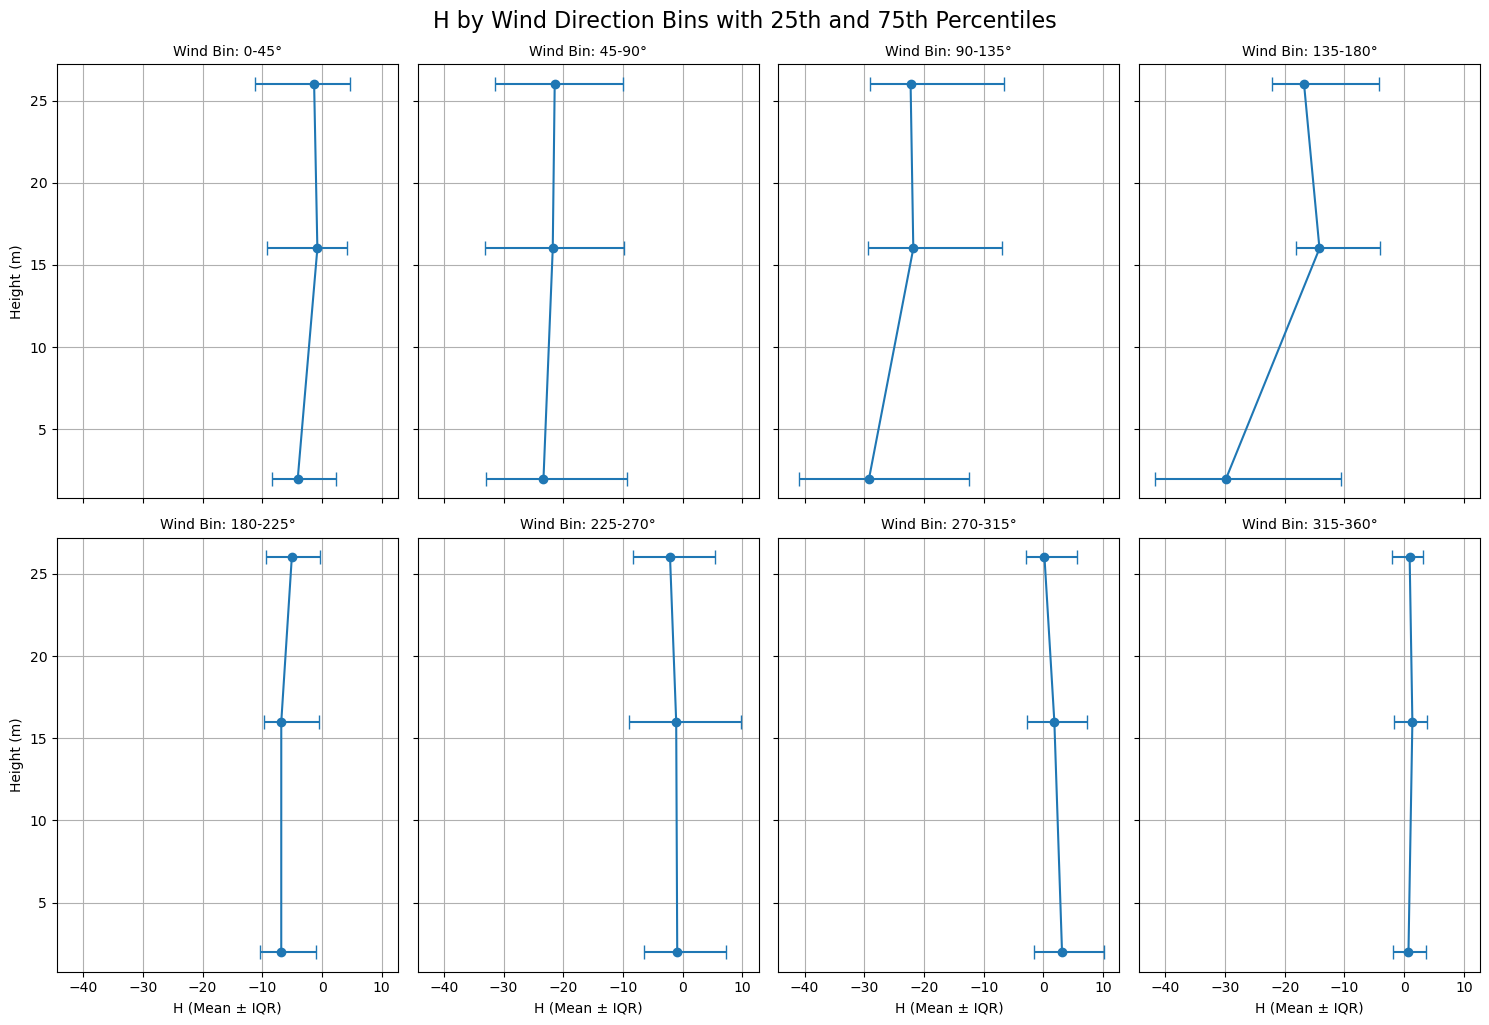

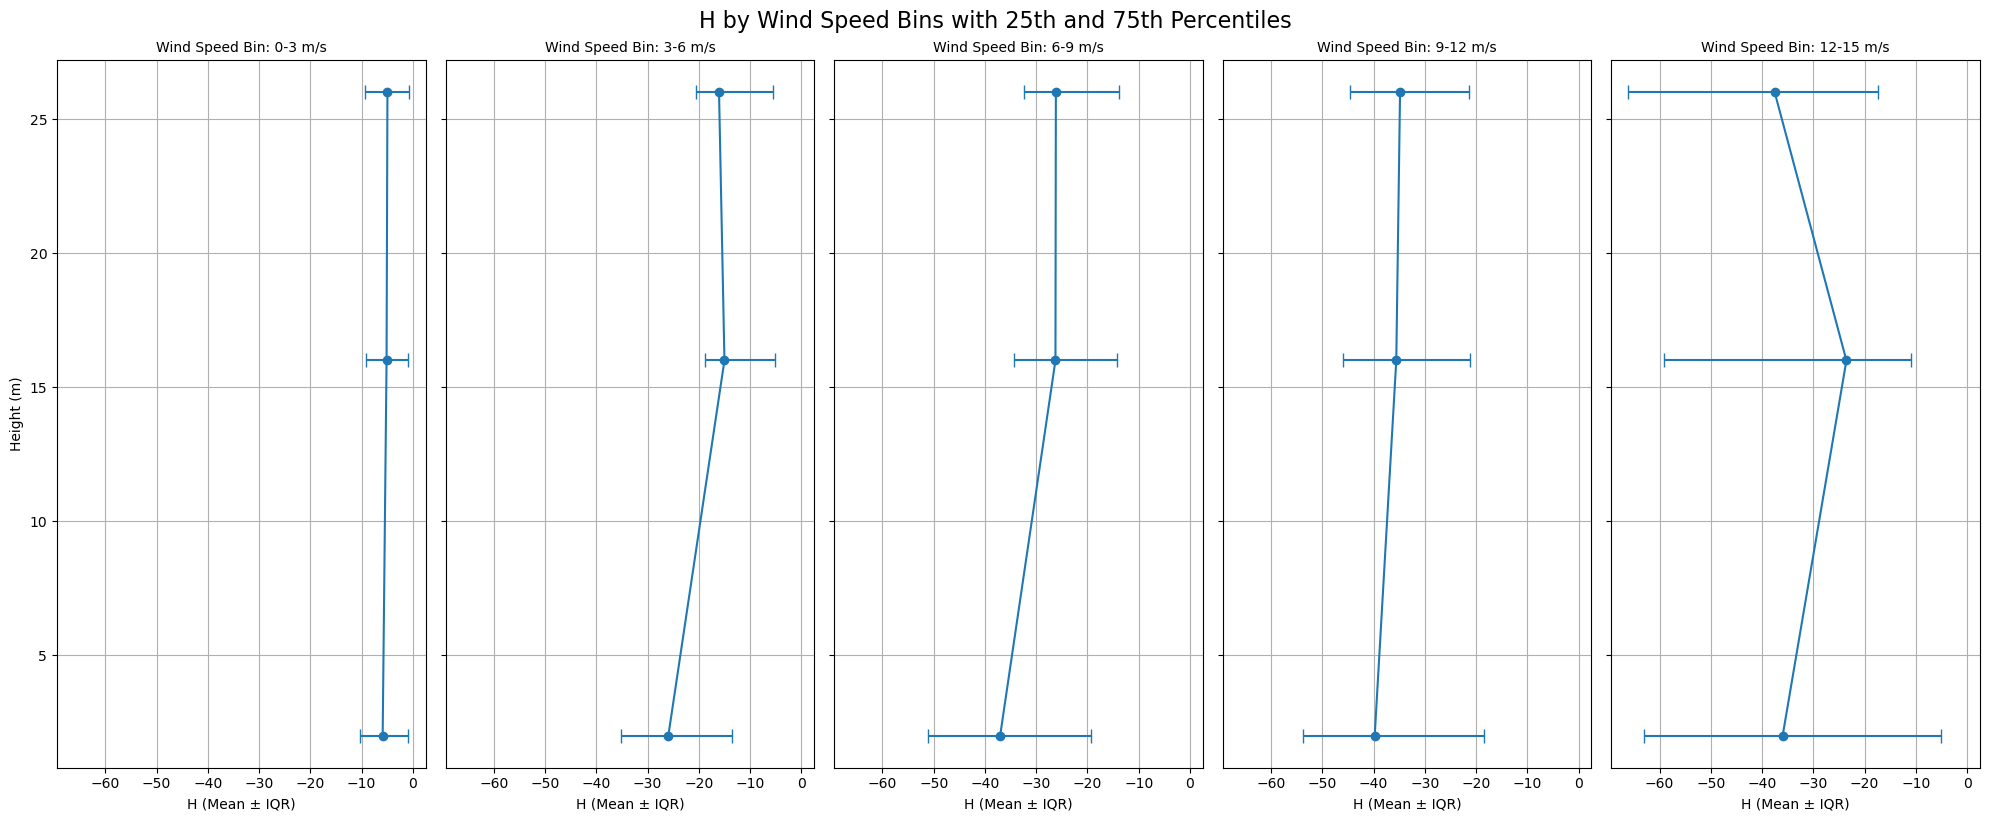

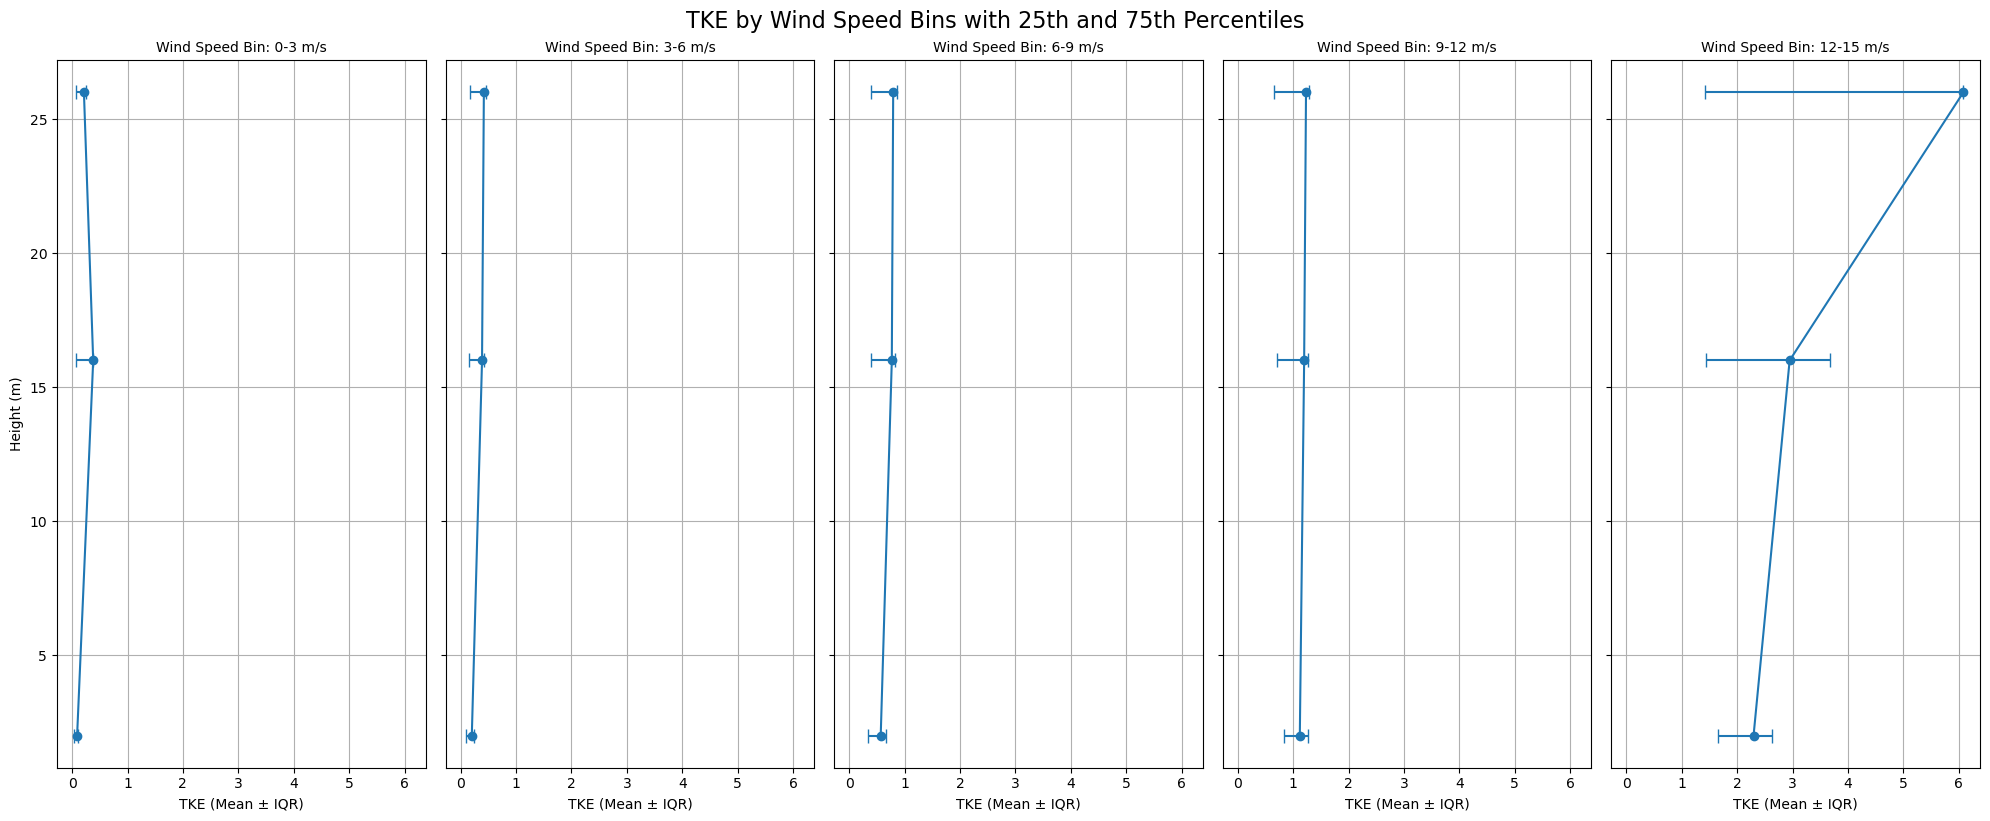

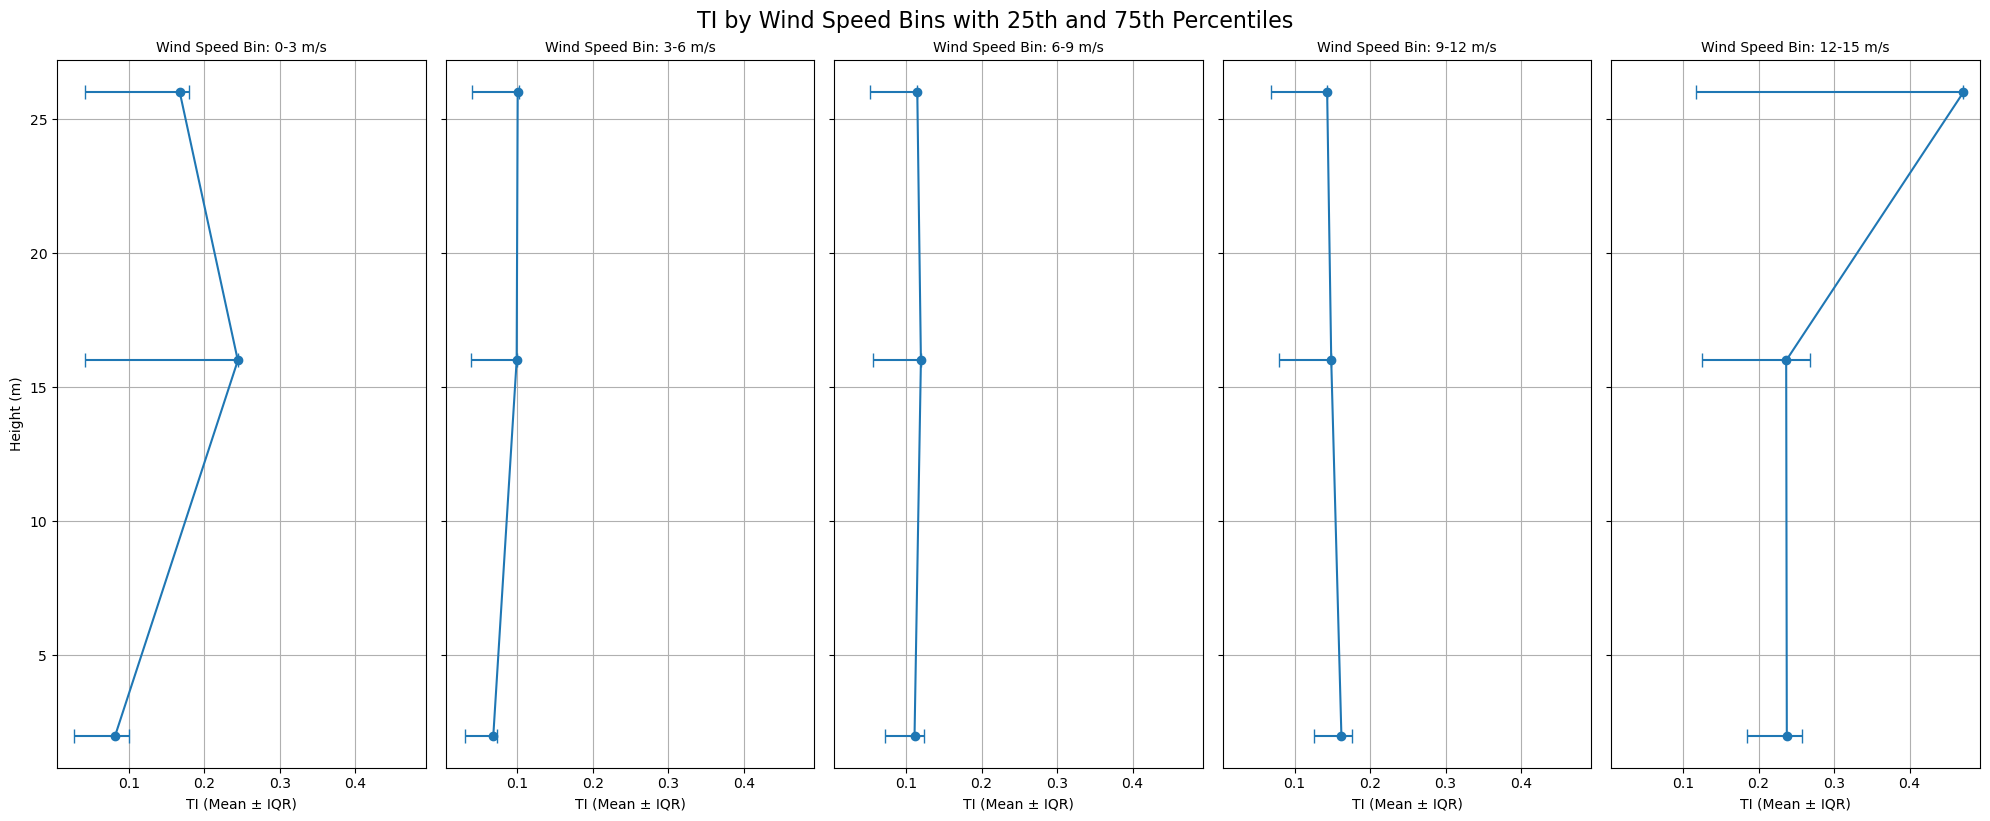

In [88]:
plot_wind_direction_binned(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, slowdata_cleaned, heights=[2, 16, 26], variable='H')
plot_wind_speed_binned(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, slowdata_cleaned, heights=[2, 16, 26], variable='H')
plot_wind_speed_binned(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, slowdata_cleaned, heights=[2, 16, 26], variable='TKE')
plot_wind_speed_binned(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, slowdata_cleaned, heights=[2, 16, 26], variable='TI')

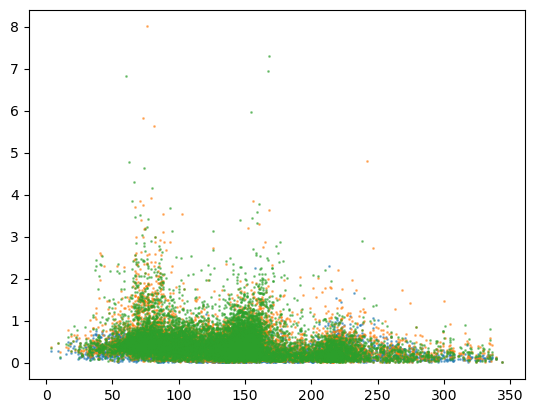

In [27]:
start = '2024-01-01 00:00'
end = '2024-12-01 00:00'
plt.plot(resample_with_threshold(slowdata_cleaned['WD1'], '30min', True, '30min', 80)[start:end], resample_with_threshold(fluxes_SFC_synced['w_var'], '30min', True, '30min', 80)[start:end]/resample_with_threshold(fluxes_SFC_synced['u*'], '30min', True, '30min', 80)[start:end], 'o', markersize=1, alpha=0.5)
plt.plot(resample_with_threshold(slowdata_cleaned['WD1'], '30min', True, '30min', 80)[start:end], resample_with_threshold(fluxes_16m_synced['w_var'], '30min', True, '30min', 80)[start:end]/resample_with_threshold(fluxes_16m_synced['u*'], '30min', True, '30min', 80)[start:end], 'o', markersize=1, alpha=0.5)
plt.plot(resample_with_threshold(slowdata_cleaned['WD1'], '30min', True, '30min', 80)[start:end], resample_with_threshold(fluxes_26m_synced['w_var'], '30min', True, '30min', 80)[start:end]/resample_with_threshold(fluxes_26m_synced['u*'], '30min', True, '30min', 80)[start:end], 'o', markersize=1, alpha=0.5)
# plt.plot(resample_with_threshold(slowdata_cleaned['WD1'], '30min', True, '30min', 80)[start:end], resample_with_threshold(fluxes_16m_synced['u*'], '30min', True, '30min', 80)[start:end], 'o', markersize=1, alpha=0.5)
# plt.plot(resample_with_threshold(slowdata_cleaned['WD1'], '30min', True, '30min', 80)[start:end], resample_with_threshold(fluxes_26m_synced['u*'], '30min', True, '30min', 80)[start:end], 'o', markersize=1, alpha=0.5)
# plt.ylim(0,1)

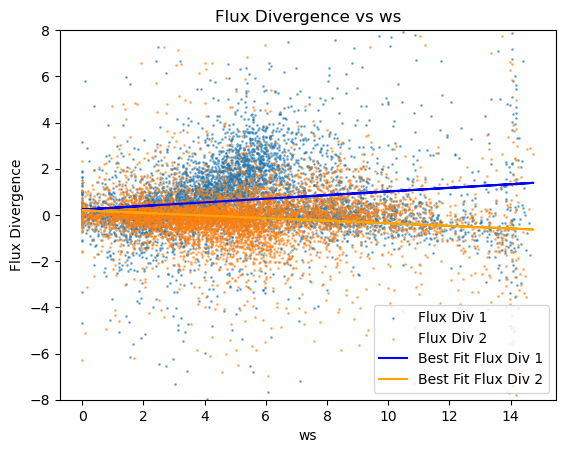

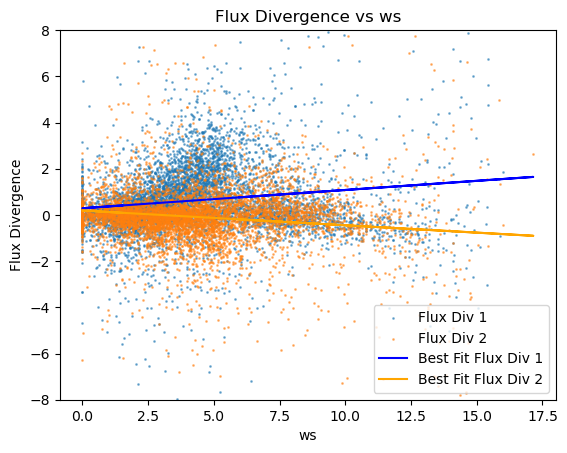

In [19]:
def plot_flux_div(ws_column, fluxes_16m, fluxes_SFC, fluxes_26m, start, end, label, ylim=(-8, 8), filter_func=None):
    """
    Plots scatter plots and lines of best fit for flux divergence against a given variable.

    Parameters:
        ws_column (pd.Series): The column to use as the x-axis variable.
        fluxes_16m (pd.DataFrame): Fluxes at 16m height.
        fluxes_SFC (pd.DataFrame): Fluxes at surface.
        fluxes_26m (pd.DataFrame): Fluxes at 26m height.
        start (str): Start datetime for slicing.
        end (str): End datetime for slicing.
        label (str): Label for the x-axis variable.
        ylim (tuple): Limits for the y-axis.
        filter_func (function, optional): Function to filter the x-axis variable.
    """
    plt.figure()
    
    flux_div_1 = (fluxes_16m['H'][start:end] - fluxes_SFC['H'][start:end]) / 14
    flux_div_2 = (fluxes_26m['H'][start:end] - fluxes_16m['H'][start:end]) / 10
    ws = resample_with_threshold(ws_column, '30min', True, '30min', 80)[start:end]
    
    if filter_func:
        ws = ws.where(filter_func)
    
    # Drop rows with NaN values to ensure all variables have the same length
    valid_data = pd.concat([ws, flux_div_1, flux_div_2], axis=1).dropna()
    ws = valid_data.iloc[:, 0]
    flux_div_1 = valid_data.iloc[:, 1]
    flux_div_2 = valid_data.iloc[:, 2]

    # Scatter plots
    plt.scatter(ws, flux_div_1, s=1, alpha=0.5, label='Flux Div 1')
    plt.scatter(ws, flux_div_2, s=1, alpha=0.5, label='Flux Div 2')

    # Line of best fit for flux_div_1
    coeffs_1 = np.polyfit(ws, flux_div_1, 1)
    line_1 = np.polyval(coeffs_1, ws)
    plt.plot(ws, line_1, color='blue', label='Best Fit Flux Div 1')

    # Line of best fit for flux_div_2
    coeffs_2 = np.polyfit(ws, flux_div_2, 1)
    line_2 = np.polyval(coeffs_2, ws)
    plt.plot(ws, line_2, color='orange', label='Best Fit Flux Div 2')

    plt.legend()
    plt.ylim(ylim)
    plt.xlabel(label)
    plt.ylabel('Flux Divergence')
    plt.title(f'Flux Divergence vs {label}')

ws_column = resample_with_threshold(slowdata_cleaned['WS1_Avg'], '30min', True, '30min', 80)

plot_flux_div(ws_column, fluxes_16m_synced, fluxes_SFC_synced, fluxes_26m_synced, start, end, 'ws', ylim=(-8, 8), filter_func=None)
ws_column = resample_with_threshold(slowdata_cleaned['WS2_Avg'], '30min', True, '30min', 80)
plot_flux_div(ws_column, fluxes_16m_synced, fluxes_SFC_synced, fluxes_26m_synced, start, end, 'ws', ylim=(-8, 8), filter_func=None)


In [15]:
slowdata_cleaned


WD1     WD2     TA     RH  HS_Cor  SFTempK  SWdown1  \
TIMESTAMP                                                                      
2024-01-01 00:00:00  159.600  154.80 -13.39  48.54   1.686    252.0   115.20   
2024-01-01 00:01:00  157.600  154.50 -13.33  48.56   1.686    252.0   115.84   
2024-01-01 00:02:00  161.900  156.40 -13.36  48.39   1.686    252.0   115.58   
2024-01-01 00:03:00  164.000  159.70 -13.44  48.37   1.686    251.9   116.29   
2024-01-01 00:04:00  160.800  163.00 -13.47  48.66   1.686    251.9   116.68   
...                      ...     ...    ...    ...     ...      ...      ...   
2024-12-31 23:56:00    6.052   23.77 -11.02  88.40   1.653    262.5    37.73   
2024-12-31 23:57:00   92.700   76.68 -11.01  88.30   1.653    262.6    35.75   
2024-12-31 23:58:00   59.650   37.63 -10.99  88.40   1.653    262.5    37.00   
2024-12-31 23:59:00   65.720   57.51 -10.99  88.40   1.653    262.5    36.98   
2025-01-01 00:00:00   77.000   69.70 -10.98  88.30   1.653    262.5    37.47   

                     SWdown2  SWup1  SWup2  ...   LWup2   SWdn  PF_FC4  \
TIMESTAMP                                   ...                          
2024-01-01 00:00:00   120.17  61.51  63.83  ...  234.96  24.81     0.0   
2024-01-01 00:01:00   121.10  61.92  64.21  ...  235.10  24.96     0.0   
2024-01-01 00:02:00   120.97  61.42  64.89  ...  234.99  24.15     0.0   
2024-01-01 00:03:00   121.63  61.99  65.07  ...  234.74  24.47     0.0   
2024-01-01 00:04:00   121.89  62.41  66.12  ...  235.02  24.59     0.0   
...                      ...    ...    ...  ...     ...    ...     ...   
2024-12-31 23:56:00    35.53  30.29  30.89  ...  271.23  40.41     0.0   
2024-12-31 23:57:00    34.72  30.33  31.13  ...  271.95  39.17     0.0   
2024-12-31 23:58:00    34.80  29.90  30.77  ...  271.68  40.17     0.0   
2024-12-31 23:59:00    34.65  29.66  29.76  ...  271.52  40.26     0.0   
2025-01-01 00:00:00    34.93  29.18  29.53  ...  271.47  40.97     0.0   

                       WS_FC4  WS1_Avg  WS2_Avg  WS1_Max  WS2_Max  WS1_Std  \
TIMESTAMP                                                                    
2024-01-01 00:00:00  2.164167    3.316    2.541    3.665    2.832    0.134   
2024-01-01 00:01:00  2.291111    3.020    2.450    3.499    2.832    0.212   
2024-01-01 00:02:00  2.552778    3.014    2.324    3.332    2.666    0.195   
2024-01-01 00:03:00  2.470833    3.096    2.381    3.499    2.666    0.170   
2024-01-01 00:04:00  2.526389    3.125    2.416    3.332    2.666    0.146   
...                       ...      ...      ...      ...      ...      ...   
2024-12-31 23:56:00  5.656389    1.772    1.608    2.499    2.332    0.254   
2024-12-31 23:57:00  1.941111    0.480    0.388    1.333    1.499    0.426   
2024-12-31 23:58:00  3.155556    0.878    0.658    1.666    1.499    0.552   
2024-12-31 23:59:00  4.444167    1.389    1.277    1.999    1.833    0.215   
2025-01-01 00:00:00  4.757222    1.670    1.474    1.999    1.666    0.118   

                     WS2_Std  
TIMESTAMP                     
2024-01-01 00:00:00    0.145  
2024-01-01 00:01:00    0.153  
2024-01-01 00:02:00    0.140  
2024-01-01 00:03:00    0.139  
2024-01-01 00:04:00    0.112  
...                      ...  
2024-12-31 23:56:00    0.289  
2024-12-31 23:57:00    0.463  
2024-12-31 23:58:00    0.447  
2024-12-31 23:59:00    0.195  
2025-01-01 00:00:00    0.127  

[527041 rows x 23 columns]

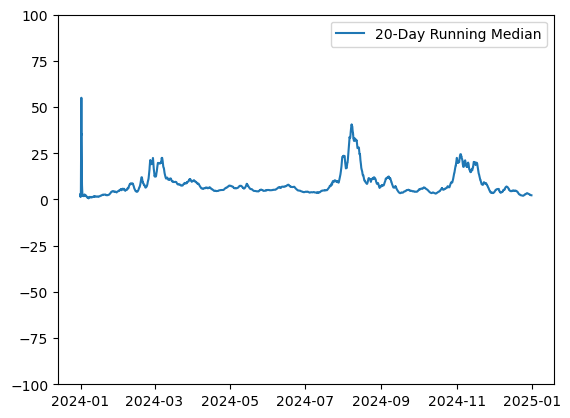

In [9]:
fluxes_SFC['L_median'] = fluxes_SFC['L'].rolling('20D').median()
plt.plot(fluxes_SFC['L_median'], label='20-Day Running Median')
plt.ylim(-100, 100)
plt.legend()

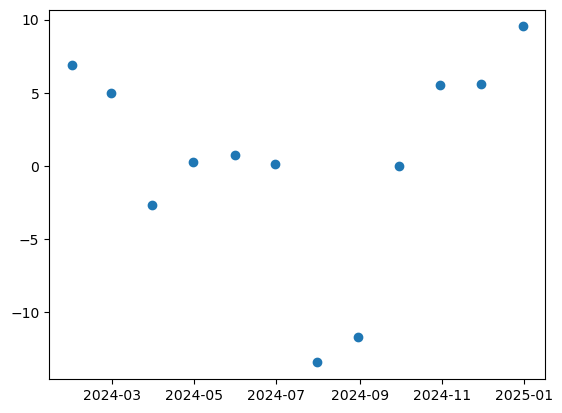

In [132]:
plt.scatter(resample_with_threshold(fluxes_SFC['LE'], '1ME', True, '1h').index, resample_with_threshold(fluxes_SFC['LE'], '1ME', True, '1h'))

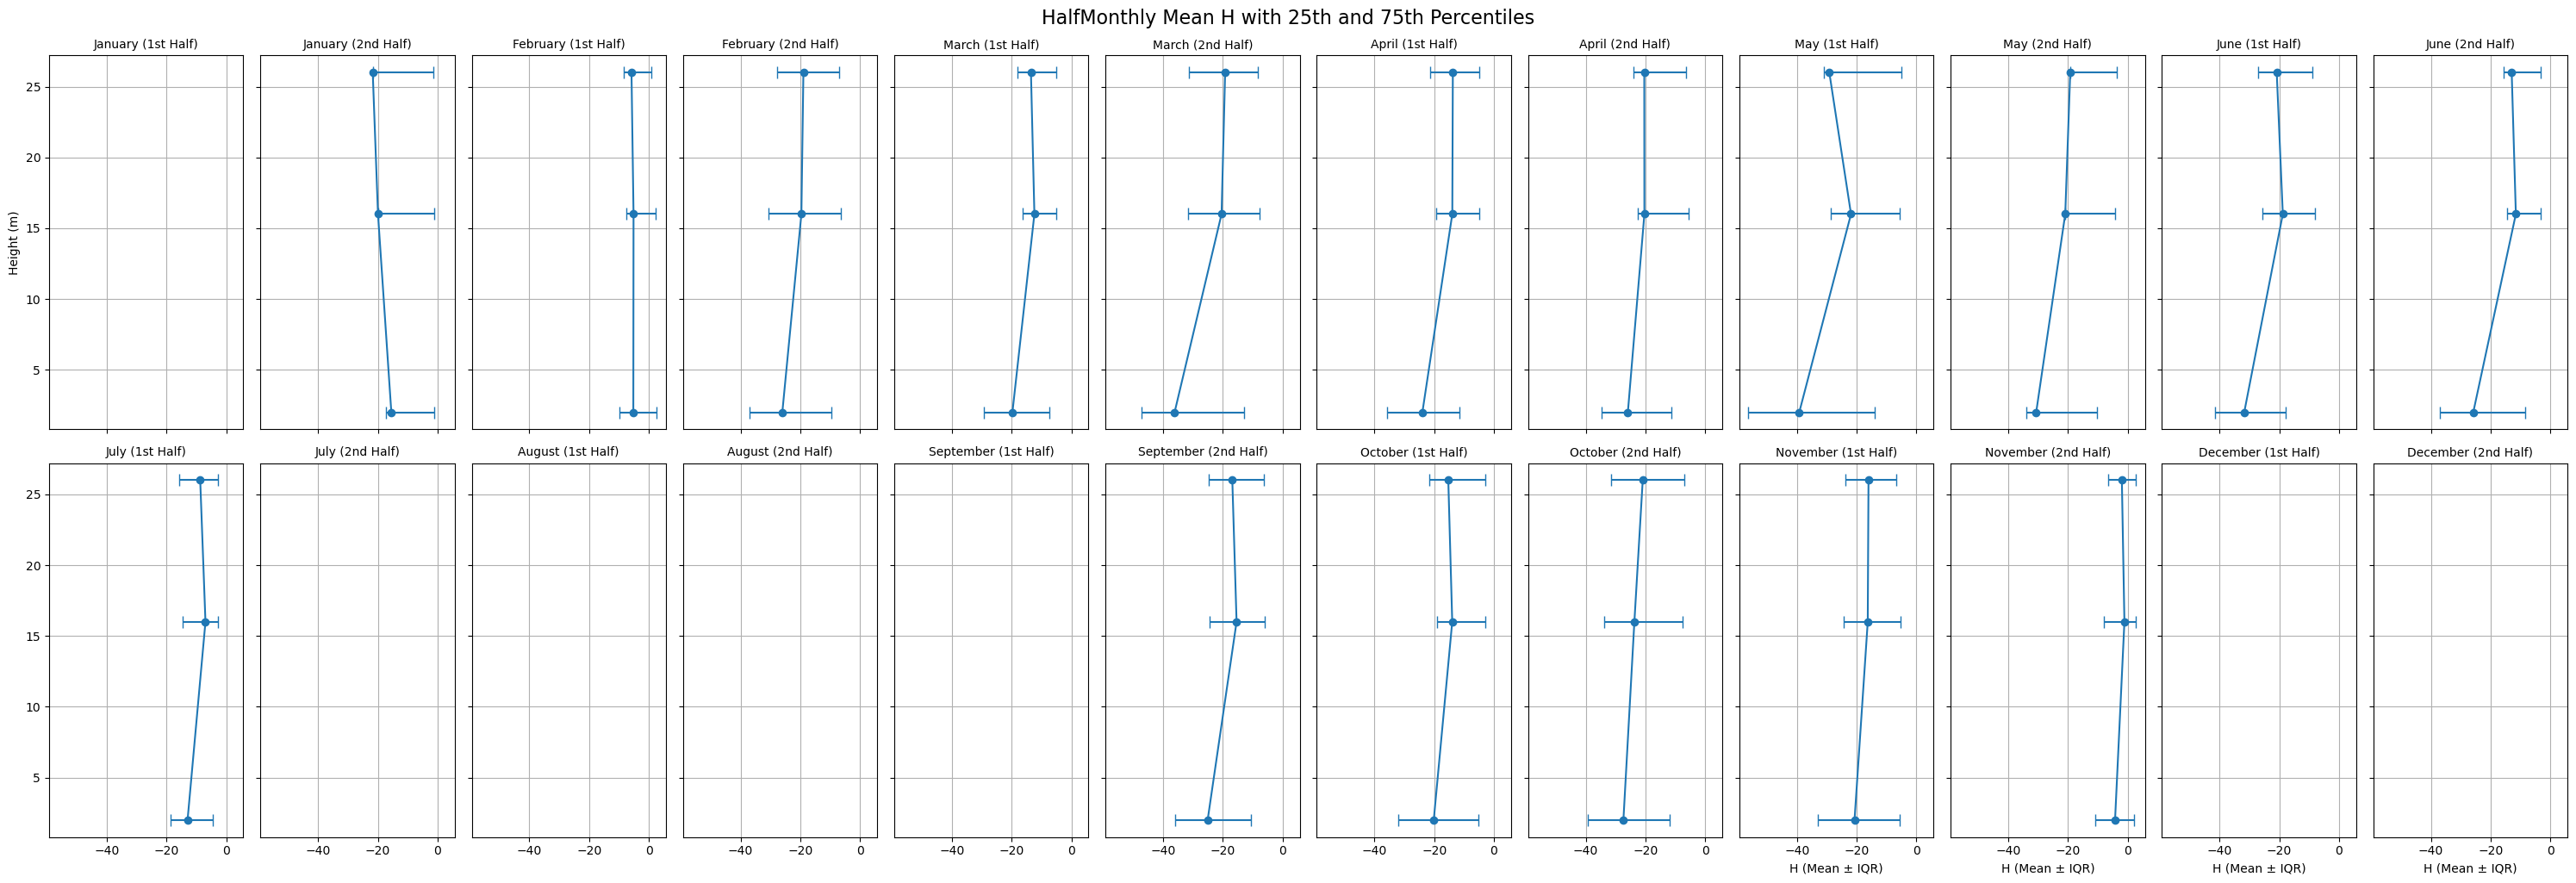

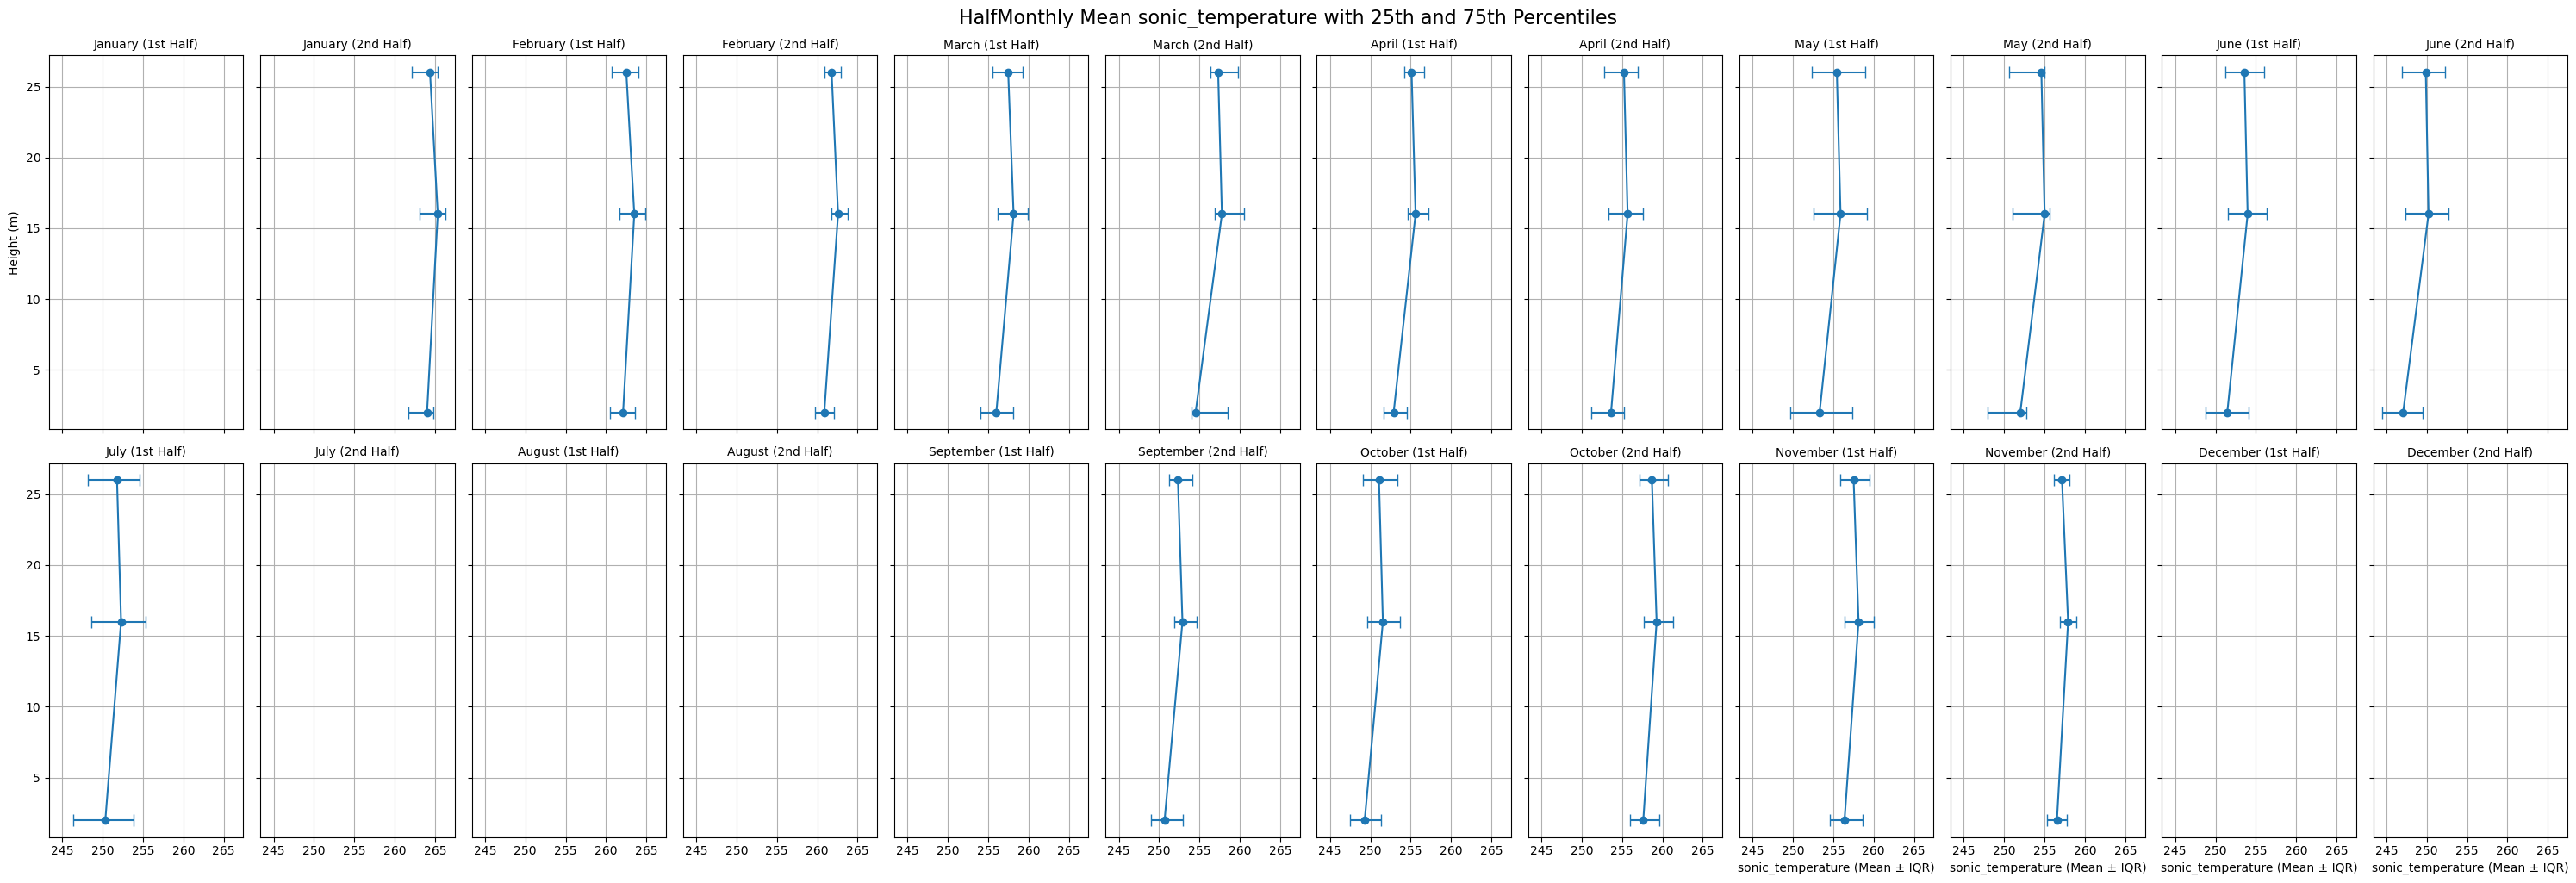

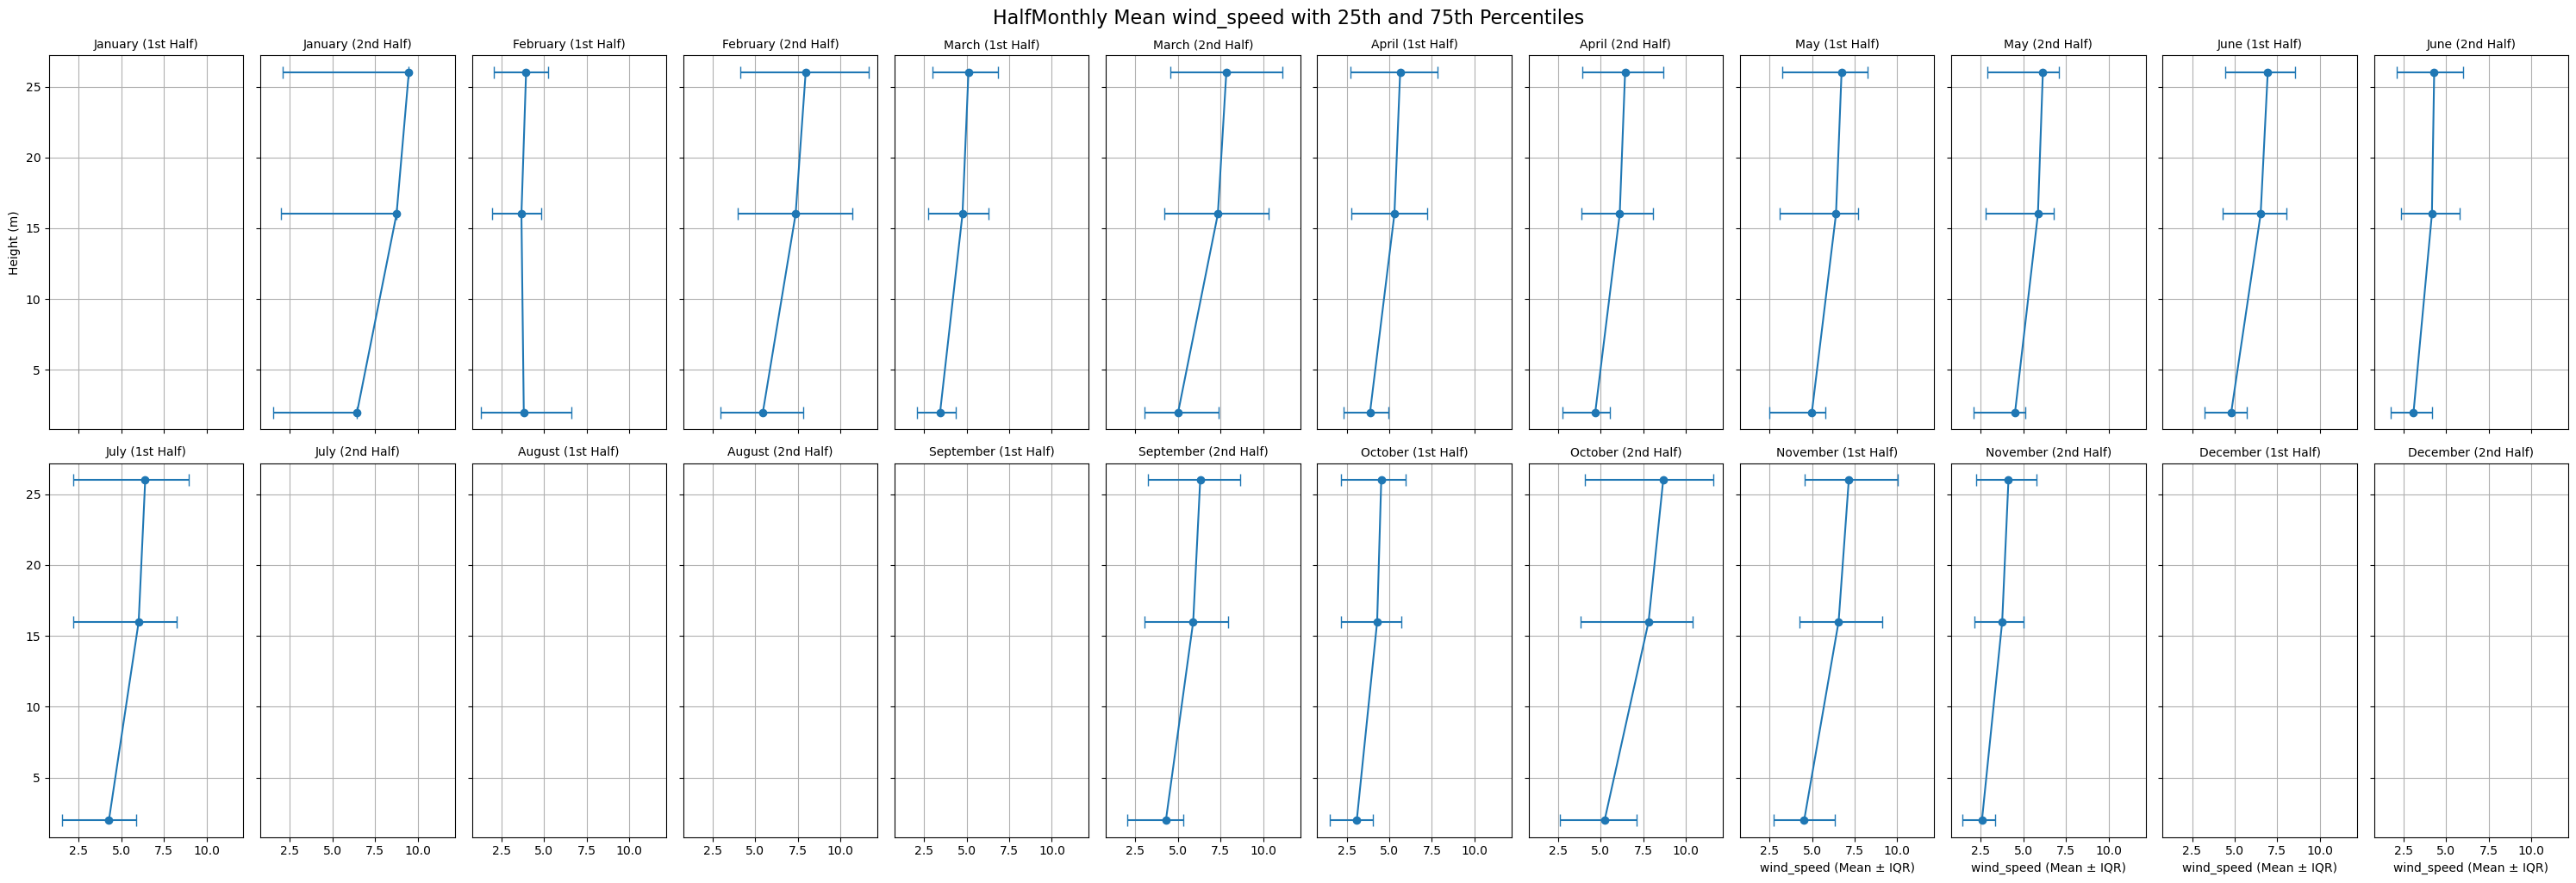

In [ ]:
def plot_bi_monthly_mean_H(fluxes_SFC, fluxes_16m, fluxes_26m, heights, variable):
    """
    Plots the bi-monthly mean H with 25th and 75th percentiles for different heights.

    Parameters:
        fluxes_SFC (pd.DataFrame): DataFrame containing SFC flux data.
        fluxes_16m (pd.DataFrame): DataFrame containing 16m flux data.
        fluxes_26m (pd.DataFrame): DataFrame containing 26m flux data.
        heights (list): List of heights corresponding to SFC, 16m, and 26m.
        variable (str): The variable to plot.
    """
    # Add 'Month' and 'Day' columns to group data
    fluxes_SFC['Month'] = fluxes_SFC.index.month
    fluxes_SFC['Day'] = fluxes_SFC.index.day
    fluxes_16m['Month'] = fluxes_16m.index.month
    fluxes_16m['Day'] = fluxes_16m.index.day
    fluxes_26m['Month'] = fluxes_26m.index.month
    fluxes_26m['Day'] = fluxes_26m.index.day

    # Add 'Month_Name' column for labelingfluxes_SFC['TI']= np.sqrt(fluxes_SFC['u_var']**2 + fluxes_SFC['v_var']**2 + fluxes_SFC['w_var']**2) / fluxes_SFC['wind_speed']
    fluxes_SFC['Month_Name'] = fluxes_SFC.index.month_name()
    fluxes_16m['Month_Name'] = fluxes_16m.index.month_name()
    fluxes_26m['Month_Name'] = fluxes_26m.index.month_name()

    # Initialize the figure
    fig, axes = plt.subplots(2, 12, figsize=(30, 10), sharey=True, sharex=True)
    axes = axes.flatten()

    # Loop through each month and create subplots for the first and second halves
    for month in range(1, 13):
        for part in [1, 2]:  # 1 for first half, 2 for second half
            ax = axes[(month - 1) * 2 + (part - 1)]

            # Filter data for the current month and part
            if part == 1:
                sfc_part = fluxes_SFC[(fluxes_SFC['Month'] == month) & (fluxes_SFC['Day'] <= 15)][variable]
                m16_part = fluxes_16m[(fluxes_16m['Month'] == month) & (fluxes_16m['Day'] <= 15)][variable]
                m26_part = fluxes_26m[(fluxes_26m['Month'] == month) & (fluxes_26m['Day'] <= 15)][variable]
                title_suffix = " (1st Half)"
            else:
                sfc_part = fluxes_SFC[(fluxes_SFC['Month'] == month) & (fluxes_SFC['Day'] > 15)][variable]
                m16_part = fluxes_16m[(fluxes_16m['Month'] == month) & (fluxes_16m['Day'] > 15)][variable]
                m26_part = fluxes_26m[(fluxes_26m['Month'] == month) & (fluxes_26m['Day'] > 15)][variable]
                title_suffix = " (2nd Half)"

            # Calculate mean, 25th, and 75th percentiles
            means = [
                resample_with_threshold(sfc_part, '15D', True, '30min', 60).mean() if not sfc_part.empty else np.nan,
                resample_with_threshold(m16_part, '15D', True, '3h', 60).mean() if not m16_part.empty else np.nan,
                resample_with_threshold(m26_part, '15D', True, '3h', 60).mean() if not m26_part.empty else np.nan
            ]
            percentiles_25 = [
                resample_with_threshold(sfc_part, '1h', True, '30min', 60).quantile(0.25) if not sfc_part.empty else np.nan,
                resample_with_threshold(m16_part, '1h', True, '1h', 60).quantile(0.25) if not m16_part.empty else np.nan,
                resample_with_threshold(m26_part, '1h', True, '1h', 60).quantile(0.25) if not m26_part.empty else np.nan
            ]
            percentiles_75 = [
                resample_with_threshold(sfc_part, '1h', True, '30min', 60).quantile(0.75) if not sfc_part.empty else np.nan,
                resample_with_threshold(m16_part, '1h', True, '1h', 60).quantile(0.75) if not m16_part.empty else np.nan,
                resample_with_threshold(m26_part, '1h', True, '1h', 60).quantile(0.75) if not m26_part.empty else np.nan
            ]
            # Plot the means with whiskers
            # Ensure error bars are non-negative
            lower_error = np.maximum(0, np.array(means) - np.array(percentiles_25))
            upper_error = np.maximum(0, np.array(percentiles_75) - np.array(means))

            # Plot the means with whiskers
            ax.errorbar(
                means, heights,
                xerr=[lower_error, upper_error],
                fmt='o-', capsize=5, label='H'
            )

            # Set titles and labels
            if not fluxes_SFC['Month_Name'][fluxes_SFC['Month'] == month].empty:
                ax.set_title(f"{fluxes_SFC['Month_Name'][fluxes_SFC['Month'] == month].iloc[0]}{title_suffix}", fontsize=10)
            else:
                ax.set_title(f"Month {month}{title_suffix}", fontsize=10)
            if (month - 1) * 2 + (part - 1) % 4 == 0:  # First column
                ax.set_ylabel("Height (m)")
            if (month - 1) * 2 + (part - 1) >= 20:  # Last row
                ax.set_xlabel(f"{variable} (Mean ± IQR)")
            ax.grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.suptitle(f"HalfMonthly Mean {variable} with 25th and 75th Percentiles", fontsize=16, y=1.02)
    plt.savefig(f'./plots/BiMonthly_Mean_{variable}.png', bbox_inches='tight', dpi=300)
    plt.show()

# Example usage
plot_bi_monthly_mean_H(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, heights=[2, 16, 26], variable='H')
plot_bi_monthly_mean_H(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, heights=[2, 16, 26], variable='sonic_temperature')
plot_bi_monthly_mean_H(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, heights=[2, 16, 26], variable='wind_speed')

(<Figure size 1300x1800 with 9 Axes>,
 array([<Axes: ylabel='Temperature [oC]'>, <Axes: ylabel='RH wrt ice [%]'>,
        <Axes: ylabel='Wind Direction'>,
        <Axes: ylabel='Wind Speed [ms-1]'>,
        <Axes: ylabel='Net Radiation [Wm-2]'>, <Axes: ylabel='HS_Cor [m]'>,
        <Axes: ylabel='Mass flux [g/m2/s]'>, <Axes: ylabel='H [Wm-2]'>,
        <Axes: ylabel='LE [Wm-2]'>], dtype=object))

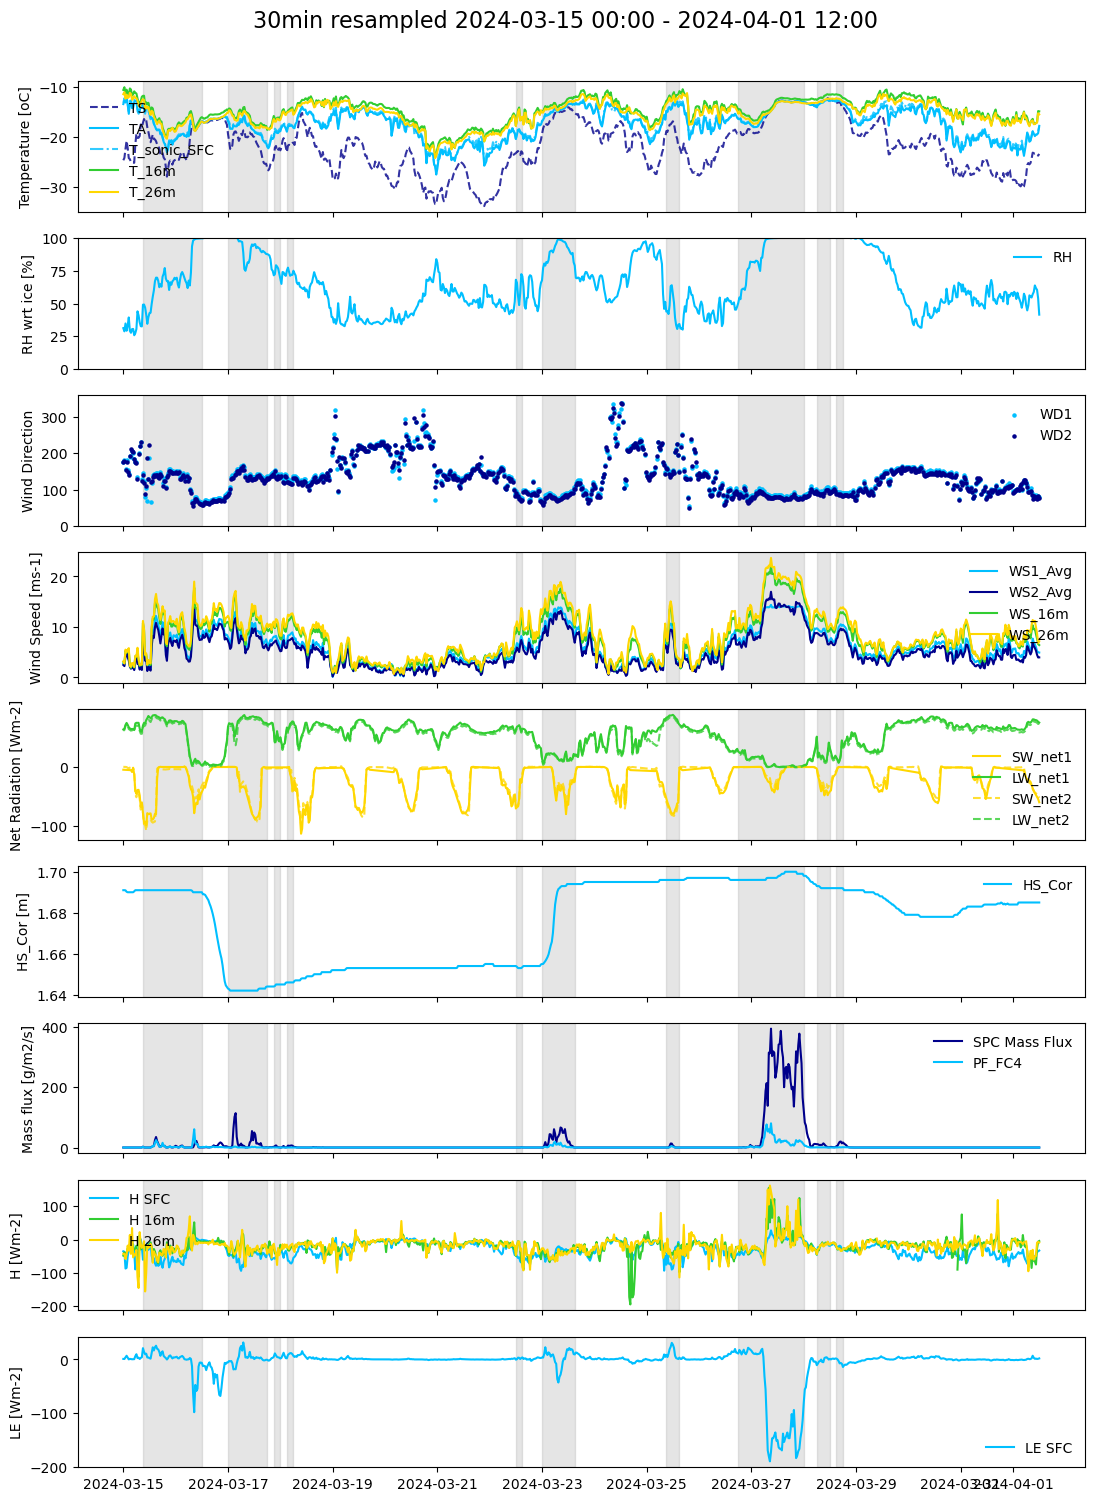

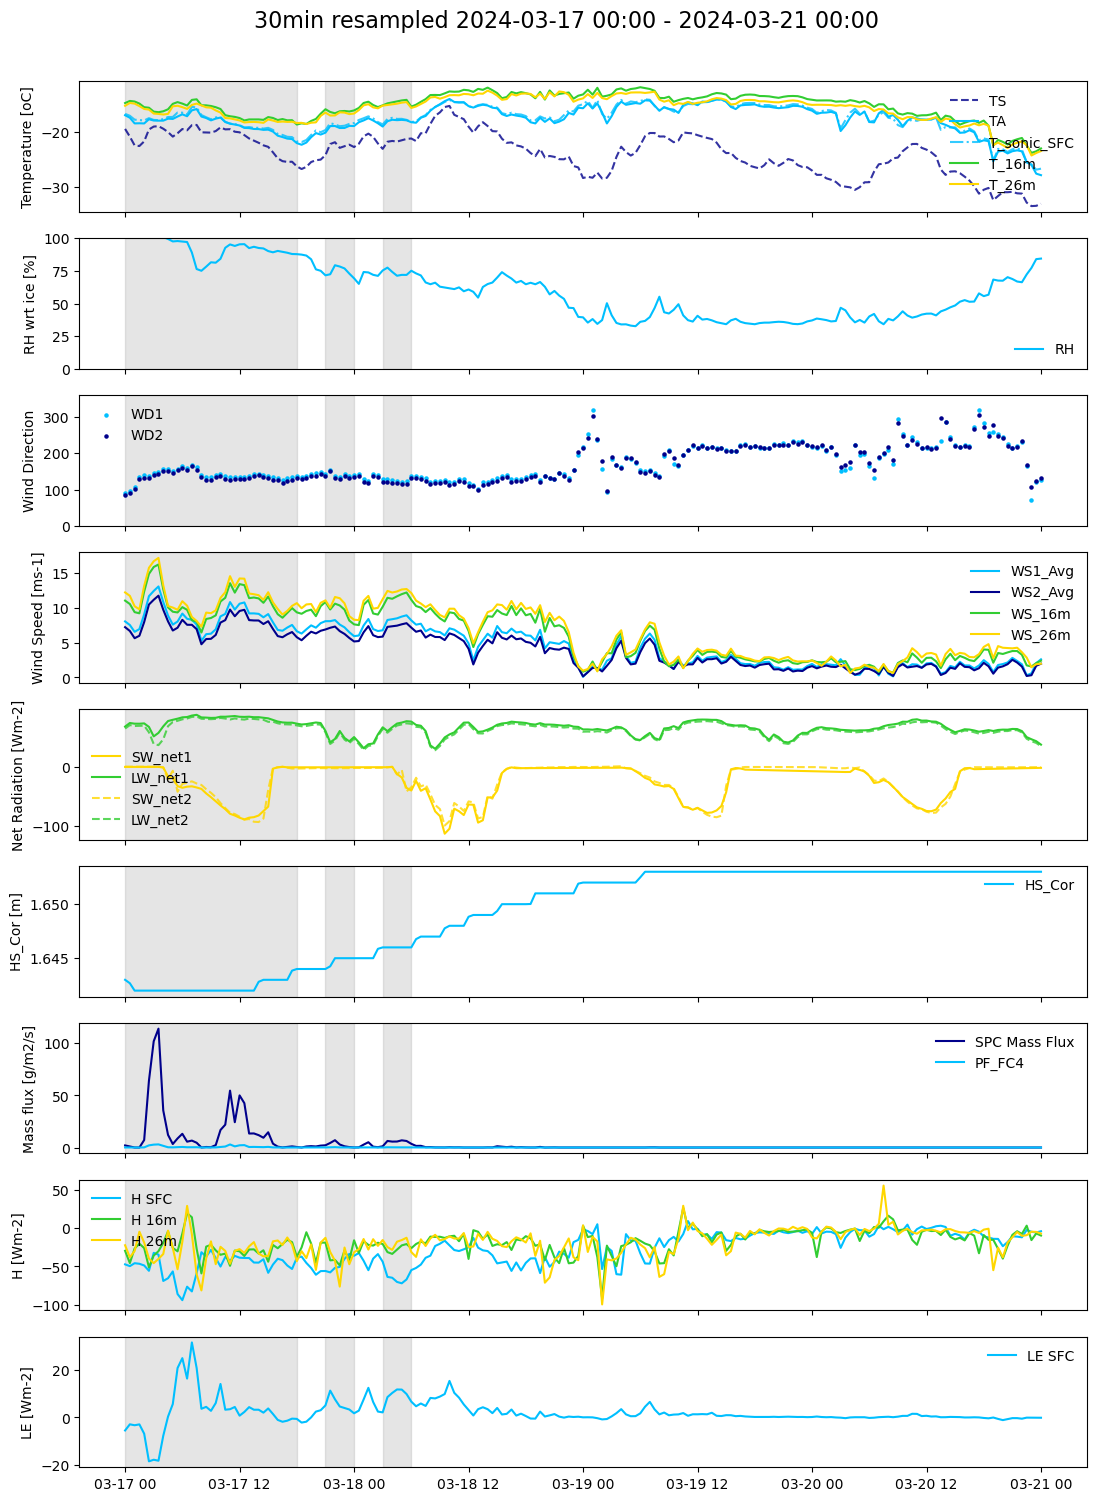

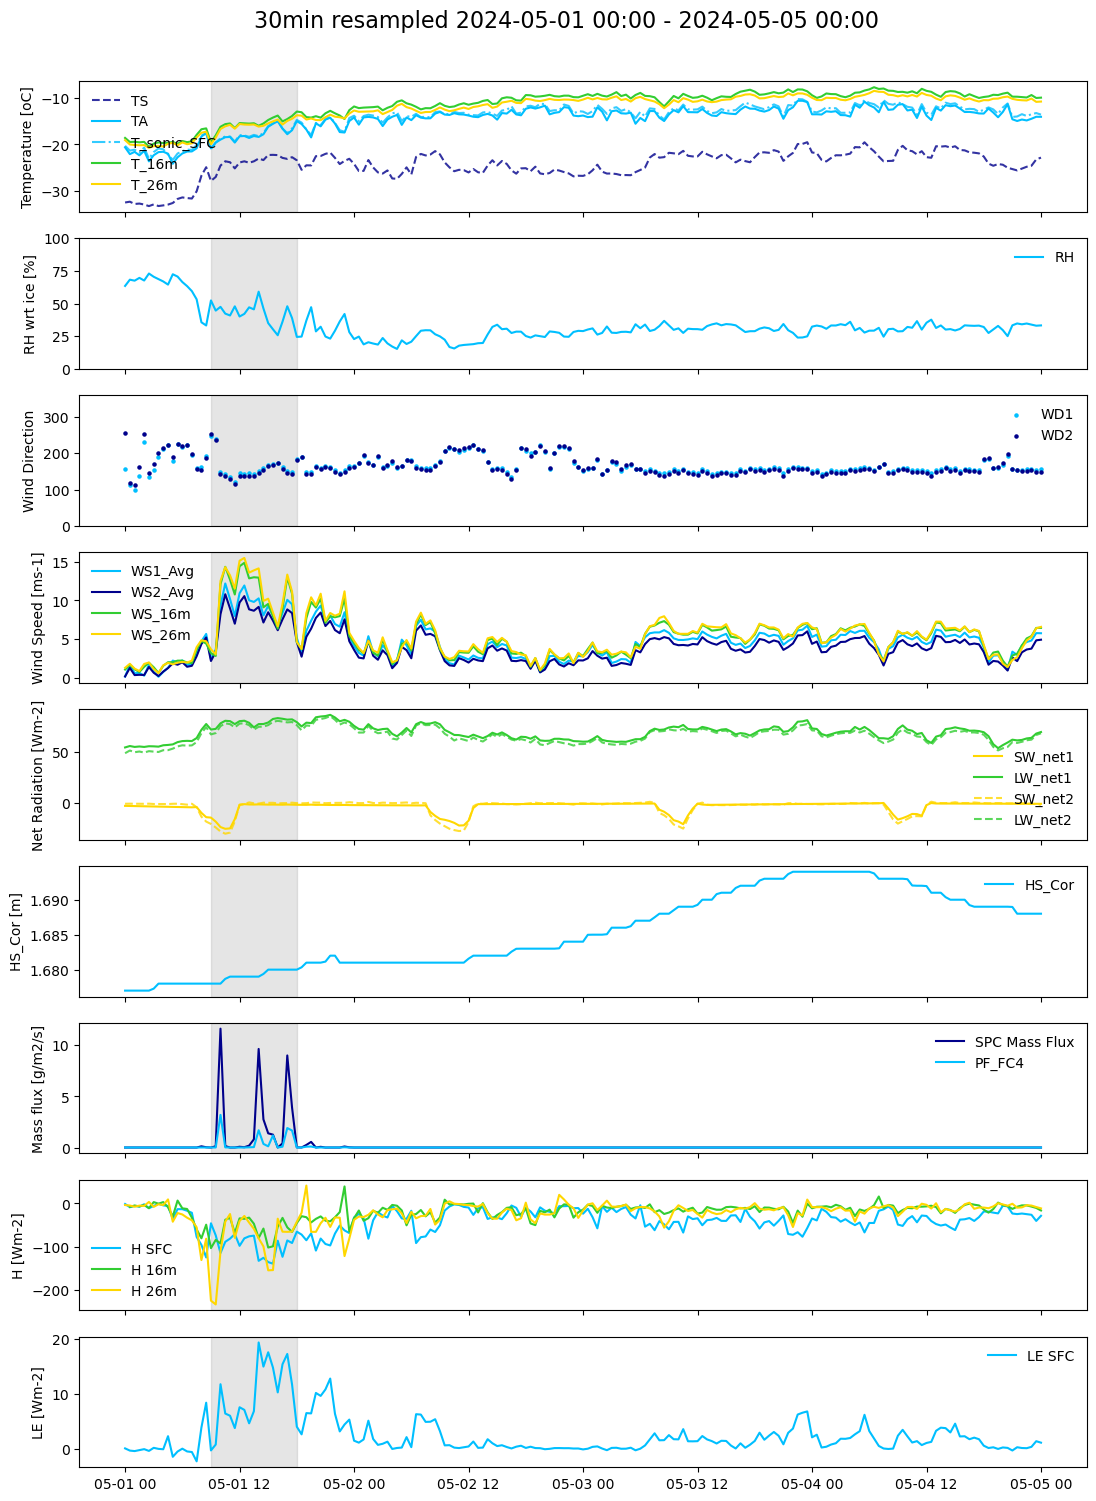

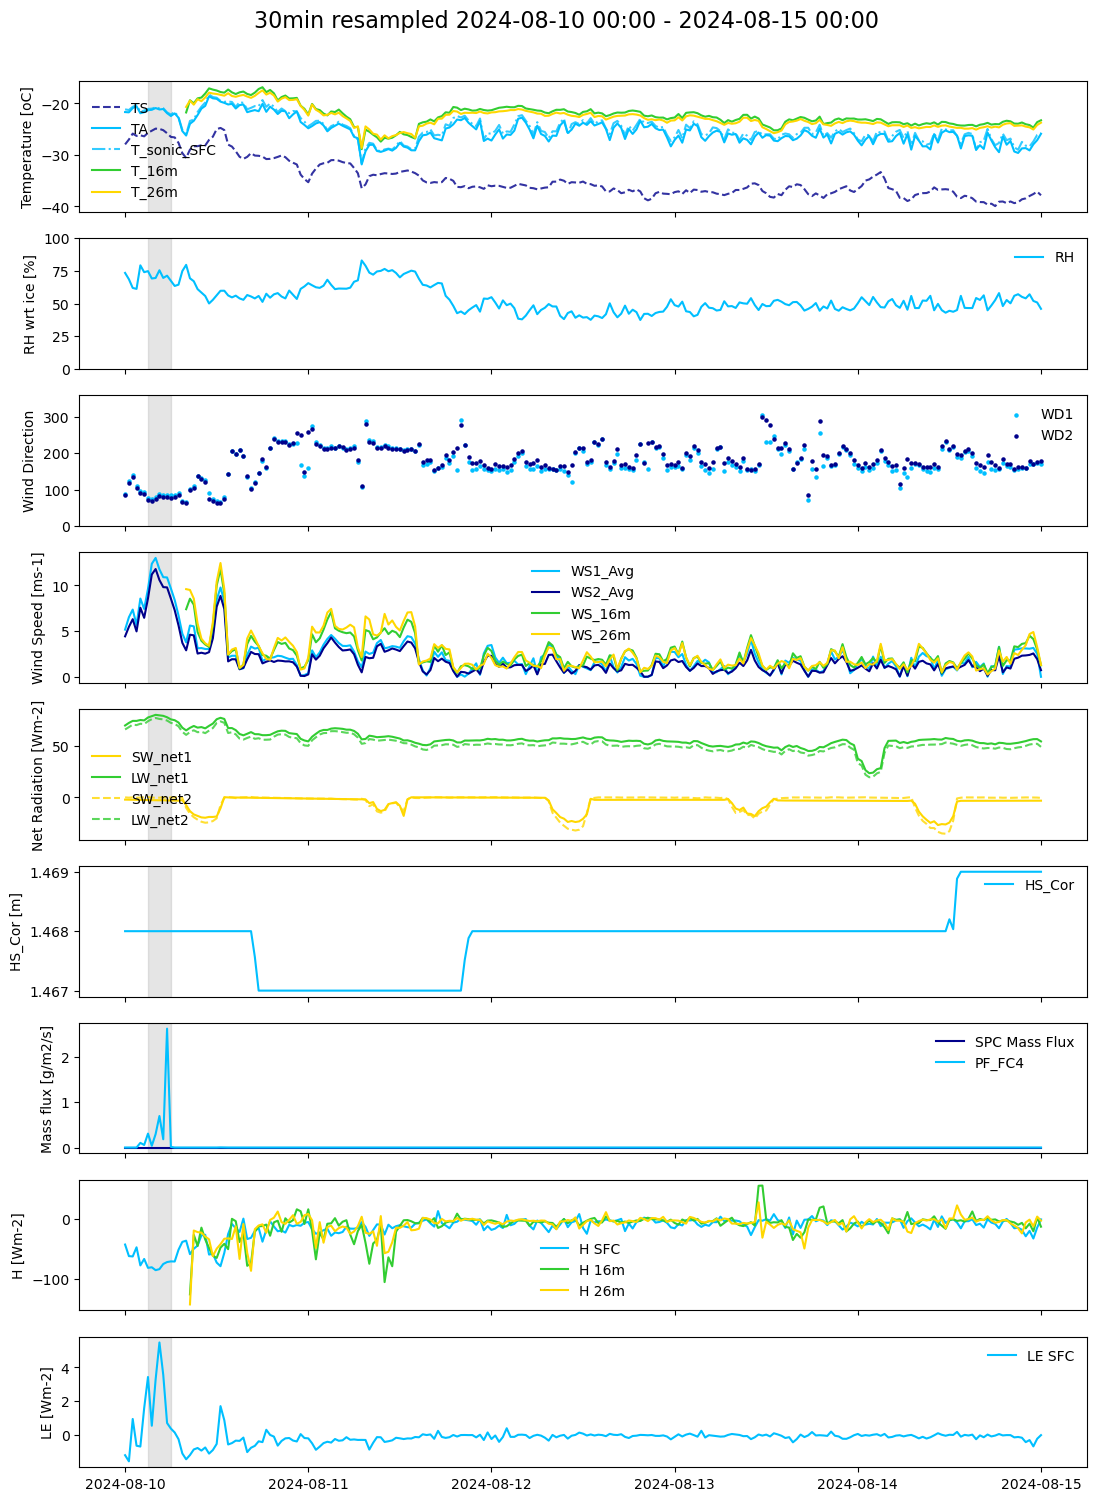

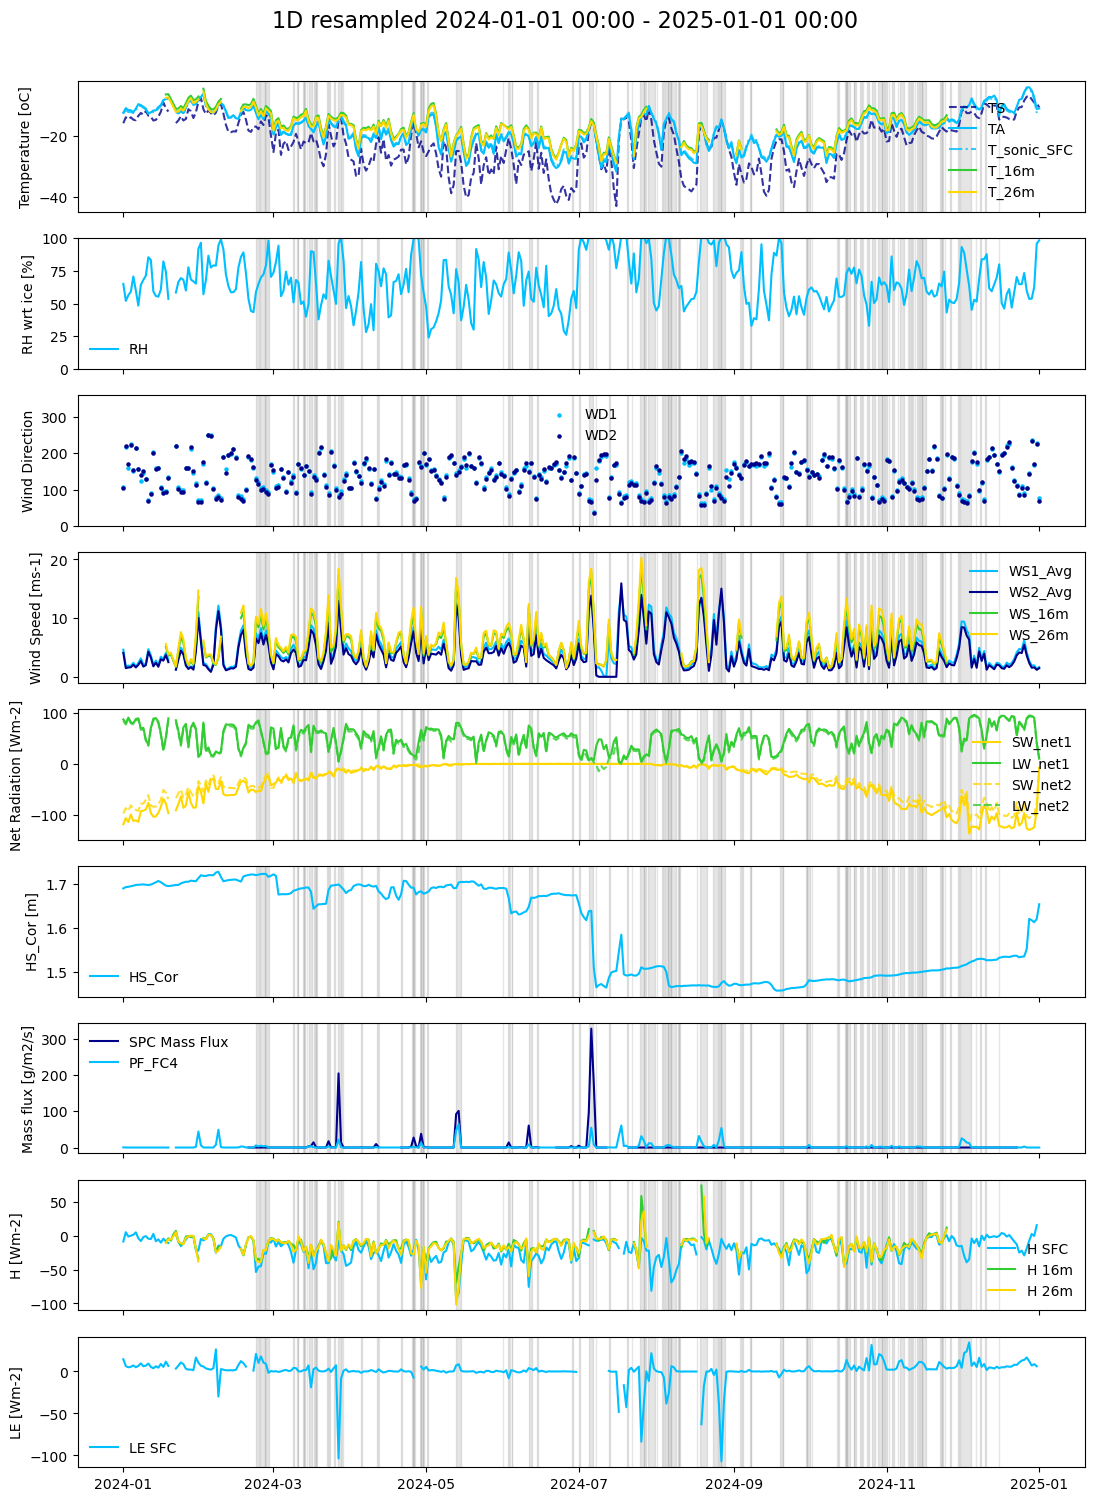

In [90]:
# """PLOT SLOWDATA AND FLUXES"""
start='2024-03-15 00:00'
end='2024-04-01 12:00'
plot_SFC_slowdata_and_fluxes(slowdata_cleaned, fluxes_SFC, fluxes_16m, fluxes_26m, sensor, start, end, SPC=SPC, resample_time='30min', interpolate=True, interp_time='30min')

start='2024-03-17 00:00'
end='2024-03-21 00:00'
plot_SFC_slowdata_and_fluxes(slowdata_cleaned, fluxes_SFC, fluxes_16m, fluxes_26m, sensor, start, end,  SPC=SPC, resample_time='30min', interpolate=True, interp_time='30min')

start='2024-05-01 00:00'
end='2024-05-05 00:00'
plot_SFC_slowdata_and_fluxes(slowdata_cleaned, fluxes_SFC, fluxes_16m, fluxes_26m, sensor, start, end,  SPC=SPC, resample_time='30min', interpolate=True, interp_time='30min')

start='2024-08-10 00:00'
end='2024-08-15 00:00'
plot_SFC_slowdata_and_fluxes(slowdata_cleaned, fluxes_SFC, fluxes_16m, fluxes_26m, sensor, start, end,  SPC=SPC, resample_time='30min', interpolate=True, interp_time='30min')

start='2024-01-01 00:00'
end='2025-01-01 00:00'
plot_SFC_slowdata_and_fluxes(slowdata_cleaned, fluxes_SFC, fluxes_16m, fluxes_26m, sensor, start, end,  SPC=SPC, resample_time='1D', interpolate=True, interp_time='30min')

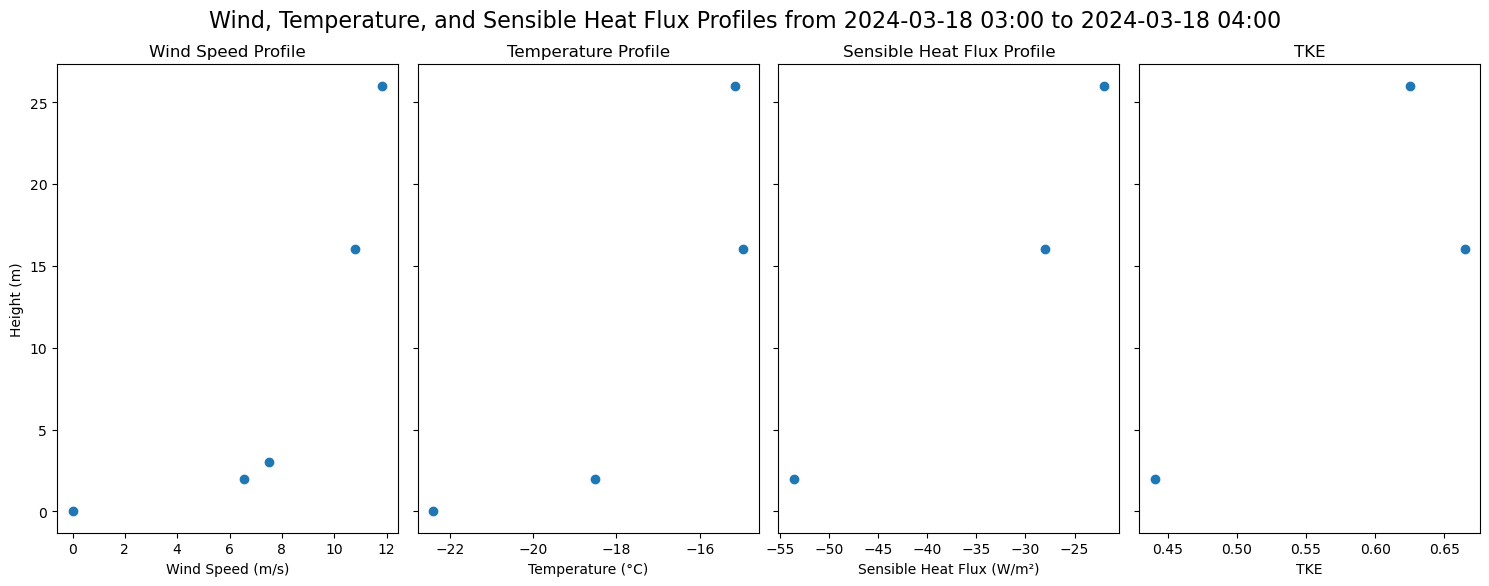

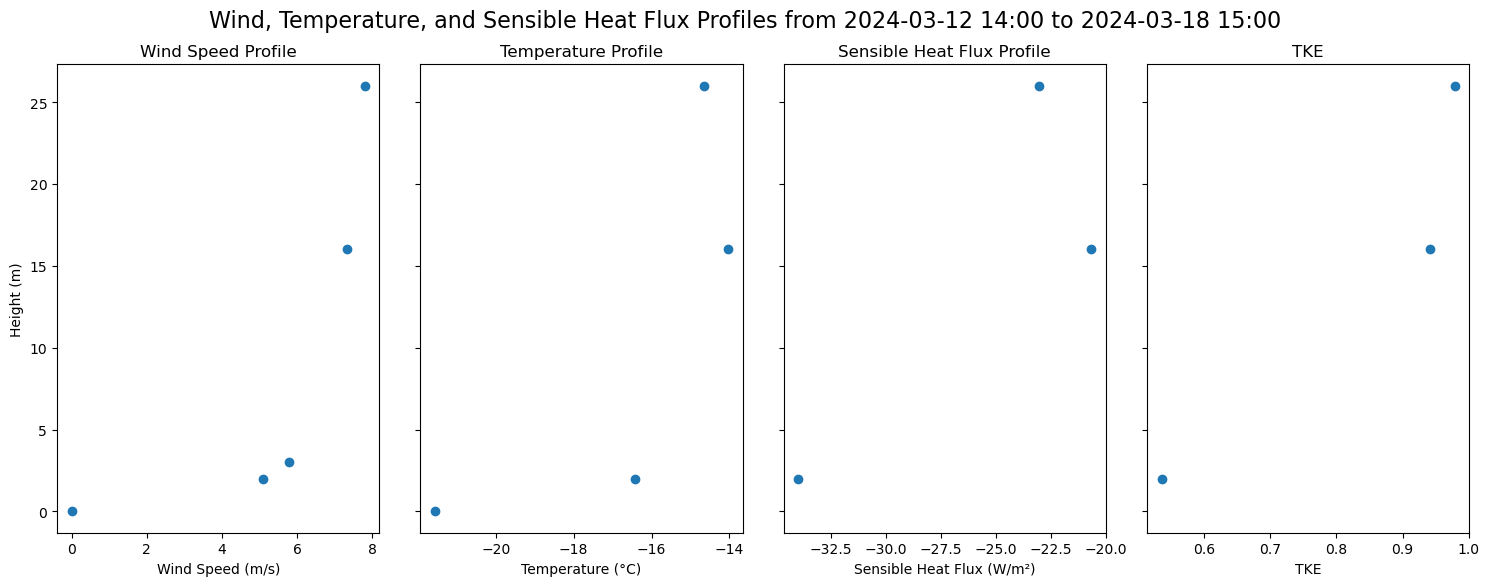

In [91]:
from scipy.optimize import curve_fit

start = '2024-03-18 03:00'
end = '2024-03-18 04:00'

check_log_profile(slowdata, fluxes_SFC, fluxes_16m, fluxes_26m, start, end, log=False)

start = '2024-03-12 14:00'
end = '2024-03-18 15:00'

check_log_profile(slowdata, fluxes_SFC, fluxes_16m, fluxes_26m, start, end, log=False)

In [141]:
slowdata_cleaned

WD1     WD2     TA     RH  HS_Cor  SFTempK  SWdown1  \
TIMESTAMP                                                                      
2024-01-01 00:00:00  159.600  154.80 -13.39  48.54   1.686    252.0   115.20   
2024-01-01 00:01:00  157.600  154.50 -13.33  48.56   1.686    252.0   115.84   
2024-01-01 00:02:00  161.900  156.40 -13.36  48.39   1.686    252.0   115.58   
2024-01-01 00:03:00  164.000  159.70 -13.44  48.37   1.686    251.9   116.29   
2024-01-01 00:04:00  160.800  163.00 -13.47  48.66   1.686    251.9   116.68   
...                      ...     ...    ...    ...     ...      ...      ...   
2024-12-31 23:56:00    6.052   23.77 -11.02  88.40   1.653    262.5    37.73   
2024-12-31 23:57:00   92.700   76.68 -11.01  88.30   1.653    262.6    35.75   
2024-12-31 23:58:00   59.650   37.63 -10.99  88.40   1.653    262.5    37.00   
2024-12-31 23:59:00   65.720   57.51 -10.99  88.40   1.653    262.5    36.98   
2025-01-01 00:00:00   77.000   69.70 -10.98  88.30   1.653    262.5    37.47   

                     SWdown2  SWup1  SWup2  ...   LWup2   SWdn  PF_FC4  \
TIMESTAMP                                   ...                          
2024-01-01 00:00:00   120.17  61.51  63.83  ...  234.96  24.81     0.0   
2024-01-01 00:01:00   121.10  61.92  64.21  ...  235.10  24.96     0.0   
2024-01-01 00:02:00   120.97  61.42  64.89  ...  234.99  24.15     0.0   
2024-01-01 00:03:00   121.63  61.99  65.07  ...  234.74  24.47     0.0   
2024-01-01 00:04:00   121.89  62.41  66.12  ...  235.02  24.59     0.0   
...                      ...    ...    ...  ...     ...    ...     ...   
2024-12-31 23:56:00    35.53  30.29  30.89  ...  271.23  40.41     0.0   
2024-12-31 23:57:00    34.72  30.33  31.13  ...  271.95  39.17     0.0   
2024-12-31 23:58:00    34.80  29.90  30.77  ...  271.68  40.17     0.0   
2024-12-31 23:59:00    34.65  29.66  29.76  ...  271.52  40.26     0.0   
2025-01-01 00:00:00    34.93  29.18  29.53  ...  271.47  40.97     0.0   

                       WS_FC4  WS1_Avg  WS2_Avg  WS1_Max  WS2_Max  WS1_Std  \
TIMESTAMP                                                                    
2024-01-01 00:00:00  2.164167    3.316    2.541    3.665    2.832    0.134   
2024-01-01 00:01:00  2.291111    3.020    2.450    3.499    2.832    0.212   
2024-01-01 00:02:00  2.552778    3.014    2.324    3.332    2.666    0.195   
2024-01-01 00:03:00  2.470833    3.096    2.381    3.499    2.666    0.170   
2024-01-01 00:04:00  2.526389    3.125    2.416    3.332    2.666    0.146   
...                       ...      ...      ...      ...      ...      ...   
2024-12-31 23:56:00  5.656389    1.772    1.608    2.499    2.332    0.254   
2024-12-31 23:57:00  1.941111    0.480    0.388    1.333    1.499    0.426   
2024-12-31 23:58:00  3.155556    0.878    0.658    1.666    1.499    0.552   
2024-12-31 23:59:00  4.444167    1.389    1.277    1.999    1.833    0.215   
2025-01-01 00:00:00  4.757222    1.670    1.474    1.999    1.666    0.118   

                     WS2_Std  
TIMESTAMP                     
2024-01-01 00:00:00    0.145  
2024-01-01 00:01:00    0.153  
2024-01-01 00:02:00    0.140  
2024-01-01 00:03:00    0.139  
2024-01-01 00:04:00    0.112  
...                      ...  
2024-12-31 23:56:00    0.289  
2024-12-31 23:57:00    0.463  
2024-12-31 23:58:00    0.447  
2024-12-31 23:59:00    0.195  
2025-01-01 00:00:00    0.127  

[527041 rows x 23 columns]

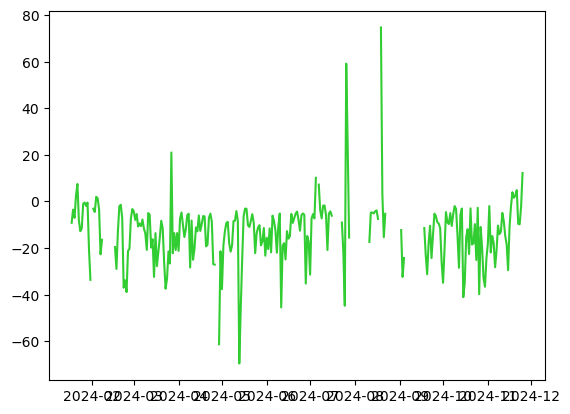

In [110]:
resample_time='1D' 
interpolate=True
interp_time='30min'
plt.plot(resample_with_threshold(fluxes_16m['H'][start:end], resample_time, interpolate, interp_time), label='H 16m', color='limegreen')

In [96]:
# Convert start and end timestamps to indices
filtered_periods = [period for period in consecutive_periods if period[0] >= pd.Timestamp(start) and period[1] <= pd.Timestamp(end)]
print(filtered_periods)

[(Timestamp('2024-03-15 06:00:00'), Timestamp('2024-03-16 12:00:00')), (Timestamp('2024-03-17 00:00:00'), Timestamp('2024-03-19 00:00:00')), (Timestamp('2024-03-19 06:00:00'), Timestamp('2024-03-19 09:00:00')), (Timestamp('2024-03-22 12:00:00'), Timestamp('2024-03-22 21:00:00')), (Timestamp('2024-03-23 00:00:00'), Timestamp('2024-03-23 18:00:00')), (Timestamp('2024-03-23 21:00:00'), Timestamp('2024-03-24 00:00:00')), (Timestamp('2024-03-25 06:00:00'), Timestamp('2024-03-25 18:00:00')), (Timestamp('2024-03-26 12:00:00'), Timestamp('2024-03-28 00:00:00')), (Timestamp('2024-03-28 06:00:00'), Timestamp('2024-03-29 03:00:00')), (Timestamp('2024-03-30 12:00:00'), Timestamp('2024-03-30 15:00:00')), (Timestamp('2024-03-31 03:00:00'), Timestamp('2024-03-31 06:00:00')), (Timestamp('2024-03-31 21:00:00'), Timestamp('2024-04-01 00:00:00')), (Timestamp('2024-04-01 06:00:00'), Timestamp('2024-04-01 12:00:00'))]


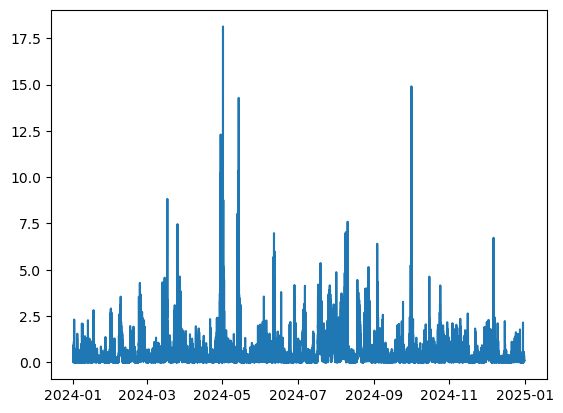

In [ ]:
plt.plot(fluxes_SFC['TKE'])
plt.plot(fluxes_16['TKE'])
plt.plot(fluxes_SFC['TKE'])

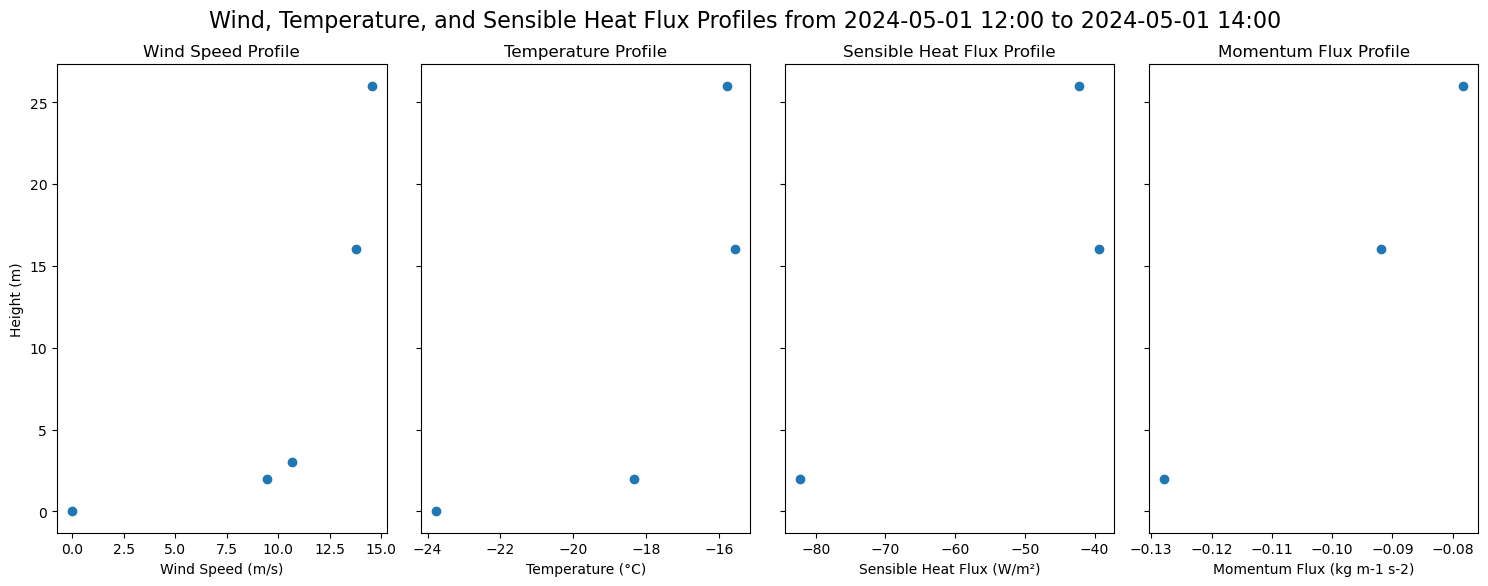

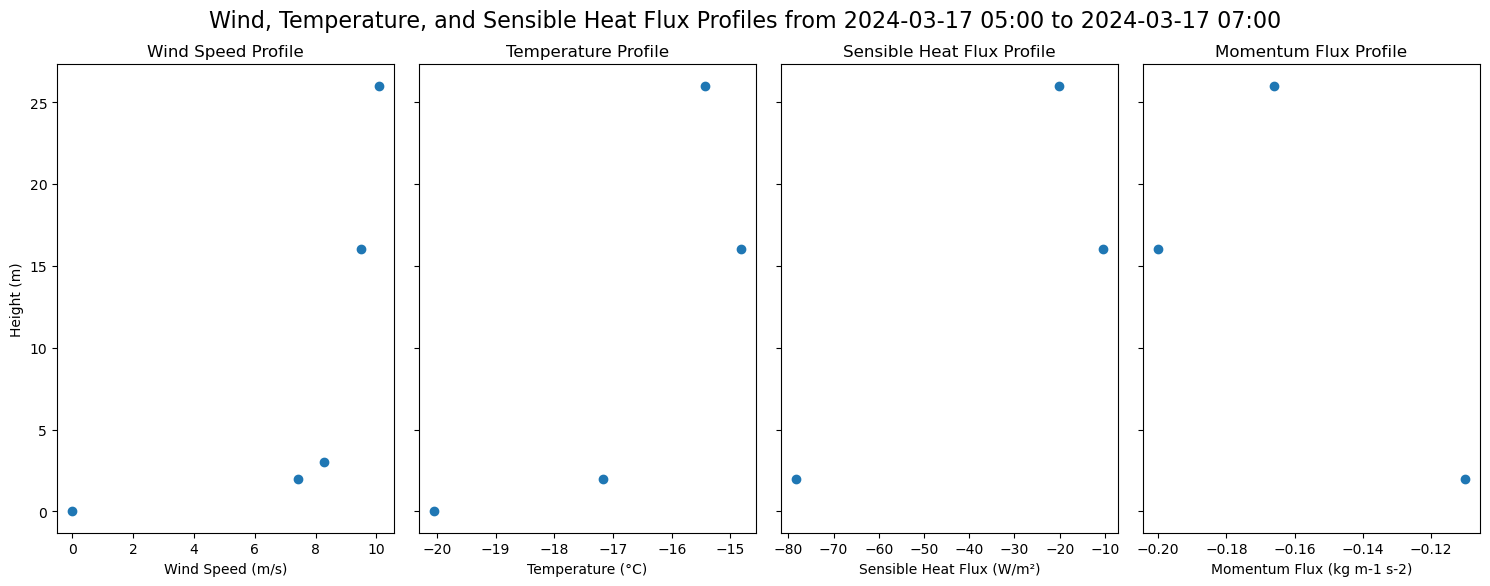

In [161]:
from scipy.optimize import curve_fit

start = '2024-05-01 12:00'
end = '2024-05-01 14:00'

check_log_profile(slowdata, fluxes_SFC, fluxes_16m, fluxes_26m, start, end, log=False)
start = '2024-03-17 05:00'
end = '2024-03-17 07:00'

check_log_profile(slowdata, fluxes_SFC, fluxes_16m, fluxes_26m, start, end, log=False)

In [ ]:
from matplotlib.animation import FuncAnimation
start = '2024-03-01 00:00'
end = '2024-03-05 00:00'
def animate_log_profile(slowdata, fluxes_SFC, fluxes_16m, fluxes_26m, heights=[0, 2, 3, 16, 26], log=False, interval='1h', save_path='./plots/log_profile_animation.mp4'):
    """
    Creates an animation of the log profile for the slow data and fluxes over time.

    Parameters:
        slowdata (pd.DataFrame): DataFrame containing slow data.
        fluxes_SFC (pd.DataFrame): DataFrame containing SFC flux data.
        fluxes_16m (pd.DataFrame): DataFrame containing 16m flux data.
        fluxes_26m (pd.DataFrame): DataFrame containing 26m flux data.
        heights (list): List of heights corresponding to the data.
        log (bool): Whether to use logarithmic scaling for wind speed profile.
        interval (str): Time interval for animation frames (e.g., '1h').
        save_path (str): Path to save the animation file.
    """
    # Create figure and axes
    fig, axes = plt.subplots(1, 4, figsize=(15, 6), sharey=True)

    def update(frame):
        # Clear axes for the next frame
        for ax in axes:
            ax.clear()

        # Define start and end times for the current frame
        start = frame
        end = frame + pd.Timedelta(interval)

        # Wind Speed Profile
        wind_speeds = [0, slowdata['WS2_Avg'][start:end].mean(), slowdata['WS1_Avg'][start:end].mean(), fluxes_16m['wind_speed'][start:end].mean(), fluxes_26m['wind_speed'][start:end].mean()]
        axes[0].scatter(wind_speeds, heights, label='Wind Speed Data Points')
        if log:
            log_wind_speeds = np.log(wind_speeds[1:])  # Exclude the first zero value
            log_heights = np.log(heights[1:])  # Exclude the first zero value
            slope, intercept = np.polyfit(log_wind_speeds, log_heights, 1)
            fitted_heights = np.exp(intercept) * np.array(wind_speeds[1:])**slope
            axes[0].plot(wind_speeds[1:], fitted_heights, label=f'Fit: slope={slope:.2f}', color='red')
            axes[0].set_xscale('log')
            axes[0].set_yscale('log')
        axes[0].set_xlabel('Wind Speed (m/s)')
        axes[0].set_ylabel('Height (m)')
        axes[0].set_title('Wind Speed Profile')

        # Temperature Profile
        temperatures = [slowdata['SFTempK'][start:end].mean() - 273.15, slowdata['TA'][start:end].mean(), fluxes_16m['sonic_temperature'][start:end].mean() - 273.15, fluxes_26m['sonic_temperature'][start:end].mean() - 273.15]
        axes[1].scatter(temperatures, heights[:2] + heights[3:], label='Temperature Data Points')
        axes[1].set_xlabel('Temperature (°C)')
        axes[1].set_title('Temperature Profile')

        # Sensible Heat Flux Profile
        sensible_heat_fluxes = [fluxes_SFC['H'][start:end].mean(), fluxes_16m['H'][start:end].mean(), fluxes_26m['H'][start:end].mean()]
        axes[2].scatter(sensible_heat_fluxes, [heights[1]] + heights[3:], label='Sensible Heat Flux Data Points')
        axes[2].set_xlabel('Sensible Heat Flux (W/m²)')
        axes[2].set_title('Sensible Heat Flux Profile')

        # TKE Profile
        heat_fluxes = [fluxes_SFC['TKE'][start:end].mean(), fluxes_16m['TKE'][start:end].mean(), fluxes_26m['TKE'][start:end].mean()]
        axes[3].scatter(heat_fluxes, [heights[1]] + heights[3:], label='TKE Data Points')
        axes[3].set_xlabel('TKE')
        axes[3].set_title('TKE')

        # Add a title for the current frame
        plt.suptitle(f'Profiles from {start} to {end}', fontsize=16, y=0.97)

    # Define the frames for the animation
    frames = pd.date_range(slowdata.index.min(), slowdata.index.max(), freq=interval)

    # Create the animation
    anim = FuncAnimation(fig, update, frames=frames, repeat=False)

    # Save the animation
    anim.save(save_path, writer='ffmpeg', fps=2)
    # plt.close(fig)

# Example usage
animate_log_profile(slowdata_cleaned, fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, log=False, interval='1h', save_path='./plots/log_profile_animation.mp4')

MovieWriter ffmpeg unavailable; using Pillow instead.


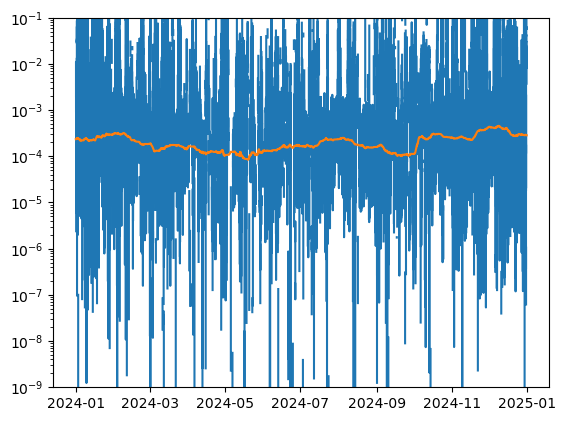

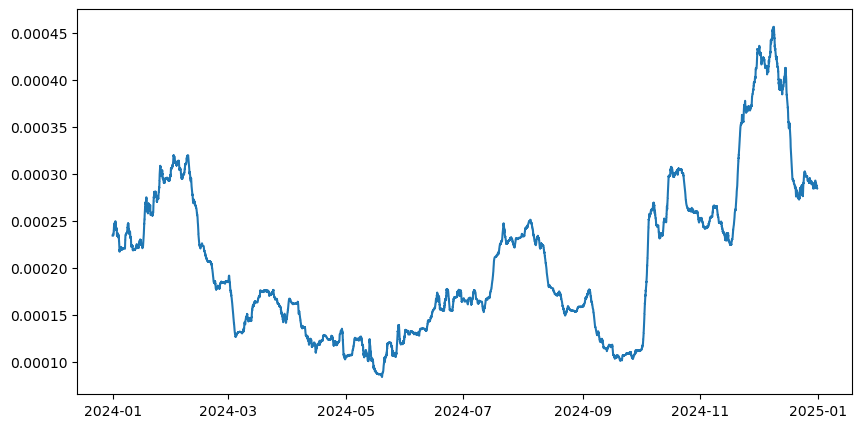

In [13]:
z0, z0rolling=compute_roughness_length(fluxes_SFC, fluxes_SFC_qc, 1.5)
plt.plot(z0)
plt.plot(z0rolling, label='z0 rolling median')
plt.yscale('log')
plt.ylim(1e-9, 1e-1)
plt.figure(figsize=(10, 5))
plt.plot(z0rolling, label='z0 rolling median')

In [ ]:
def rolling_median(data, column_name='HS_Cor', window='1D', max_value=None):
    """
    Function to despike snow height data using a one-day moving median filter.
    
    Parameters:
    - data (pd.DataFrame): The input DataFrame containing snow height data.
    - column_name (str): The name of the column containing snow height data.
    
    Returns:
    - pd.Series: The despiked snow height data.
    """
    if column_name not in data.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")
    
    # Apply a one-day moving median filter
    median_filtered = data[column_name].rolling(window=window, center=True, min_periods=1).median()
    if max_value is not None:
        # Remove values above 2m
        median_filtered[median_filtered > max_value] = np.nan
        # Interpolate NaN values
        median_filtered = median_filtered.interpolate(method='linear', limit_direction='both')
    return median_filtered

In [21]:
import glob
folder='/home/engbers/Documents/PhD/EC_data_convert/SFC/202403/'
fastdata_list = []
units_metadata = {}

for file in sorted(glob.glob(folder + '*.dat')):
    temp_data = pd.read_csv(
        file,
        sep='\t',
        index_col=0,
        header=0,
        low_memory=False,
        na_values=['NaN'])
    temp_data.index = pd.to_datetime(temp_data.index, errors='coerce', format='mixed')
    dropped_row = temp_data.iloc[0]  # Extract the first row as metadata
    temp_data = temp_data.iloc[1:]  # Remove the first row from the data
    units_metadata[file] = dropped_row.to_dict()  # Store metadata in a dictionary
    
    # Convert all columns to numeric
    temp_data = temp_data.apply(pd.to_numeric, errors='coerce')
    
    fastdata_list.append(temp_data)  # Add the cleaned DataFrame to the list

# Concatenate all DataFrames in the list into a single DataFrame
fastdata = pd.concat(fastdata_list, ignore_index=False)

# Print the resulting DataFrame
print(fastdata)

                              Ux       Uy       Uz        Ts  LI_H2Om  LI_Pres
2024-03-01 00:00:00.000  0.48250 -2.40475  0.21900 -20.63008     35.9   1831.0
2024-03-01 00:00:00.100  0.24375 -2.55500  0.21825 -20.75847     36.6   1805.0
2024-03-01 00:00:00.200  0.18450 -2.35725  0.08550 -20.63641     36.4   1834.0
2024-03-01 00:00:00.300  0.45625 -2.39325  0.15050 -20.66336     36.1   1860.0
2024-03-01 00:00:00.400  0.66725 -2.33725  0.10750 -20.62689     36.1   1829.0
...                          ...      ...      ...       ...      ...      ...
2024-03-31 23:59:59.500  1.15900 -3.25900  0.14600 -22.77211     20.6   2065.0
2024-03-31 23:59:59.600  1.34400 -3.01650 -0.00975 -22.53528     20.7   2065.0
2024-03-31 23:59:59.700  1.12675 -2.96000 -0.05600 -22.51001     21.2   2089.0
2024-03-31 23:59:59.800  0.71775 -2.75525 -0.08900 -22.49261     20.9   2091.0
2024-03-31 23:59:59.900  1.11875 -2.67950 -0.04650 -22.50684     21.1   2065.0

[26784000 rows x 6 columns]


In [22]:
"""DOUBLE ROTATE THE DATA TO ALIGN WIND VECTOR WITH X-AXIS"""
fastdata_rot, angles=double_rotation(fastdata)


Double rotation for blocks of 0 days 00:30:00


/home/engbers/Documents/Github/DataProcessingScripts/EC/Func_MRFD.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gaps = pd.concat([gaps, pd.DataFrame({'idx_before_gap': [len(data)],


MRD for DataFrame
Number of gaps: 1


 88%|████████▊ | 878169/1000000 [09:43<01:20, 1504.87it/s]


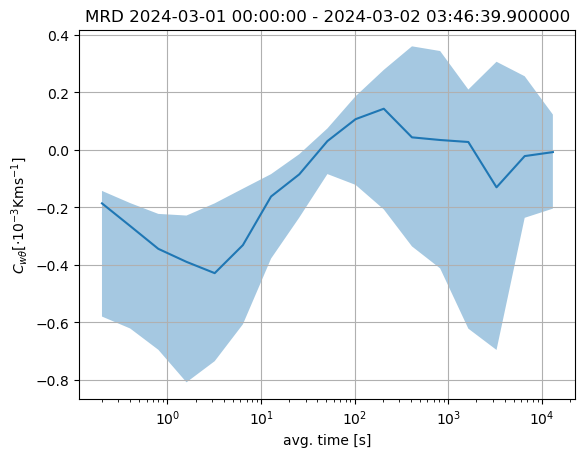

In [5]:
"""DO MRD TO CHECK AVERAGING TIME"""
M=17
(mrd_x, mrd_data, time_middle)=completemrd(fastdata_rot[0:1000000], 'Uz', 'Ts', M, shift=round(int(0.1 * 2**M)), plot=True)

MRD for DataFrame
Number of gaps: 1


 88%|████████▊ | 878169/999999 [08:24<01:10, 1739.83it/s]


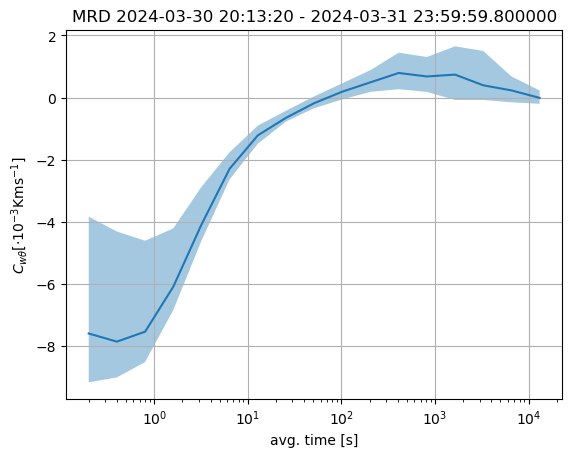

In [6]:
"""DO MRD TO CHECK AVERAGING TIME"""
M=17
(mrd_x, mrd_data, time_middle)=completemrd(fastdata_rot[-1000000:-1], 'Uz', 'Ts', M, shift=round(int(0.1 * 2**M)), plot=True)

/home/engbers/Documents/Github/DataProcessingScripts/EC/Func_MRFD.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gaps = pd.concat([gaps, pd.DataFrame({'idx_before_gap': [len(data)],


MRD for DataFrame
Number of gaps: 1


 92%|█████████▏| 1376235/1500000 [20:17<01:49, 1130.60it/s]


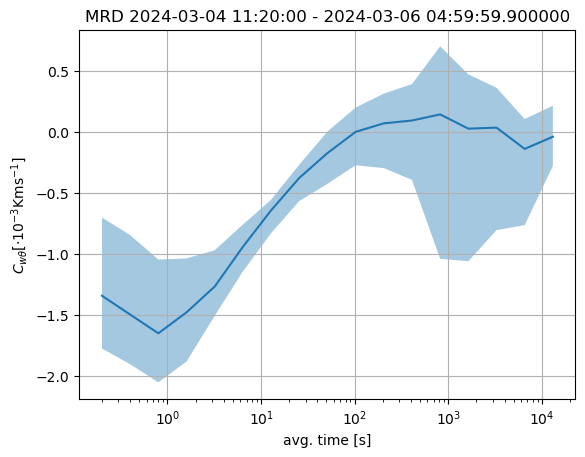

In [23]:
"""DO MRD TO CHECK AVERAGING TIME"""
M=17
(mrd_x, mrd_data, time_middle)=completemrd(fastdata_rot[3000000:4500000], 'Uz', 'Ts', M, shift=round(int(0.1 * 2**M)), plot=True)

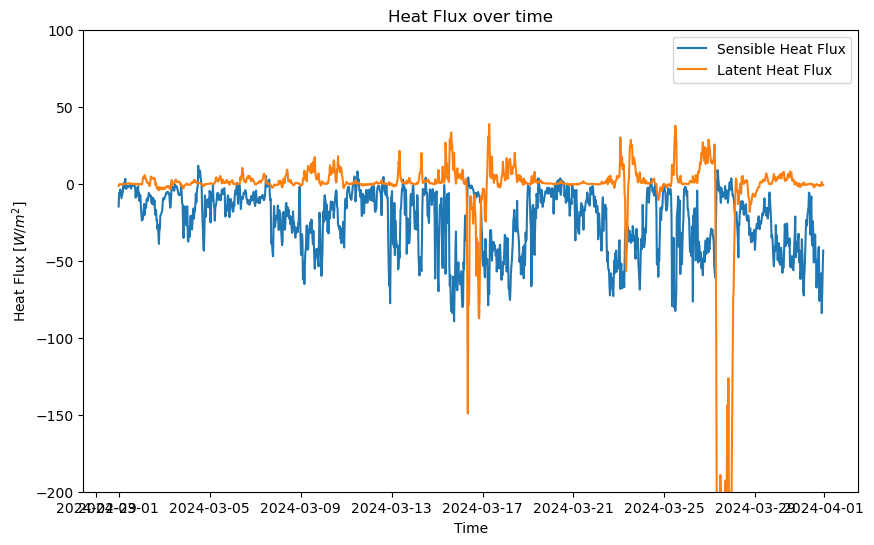

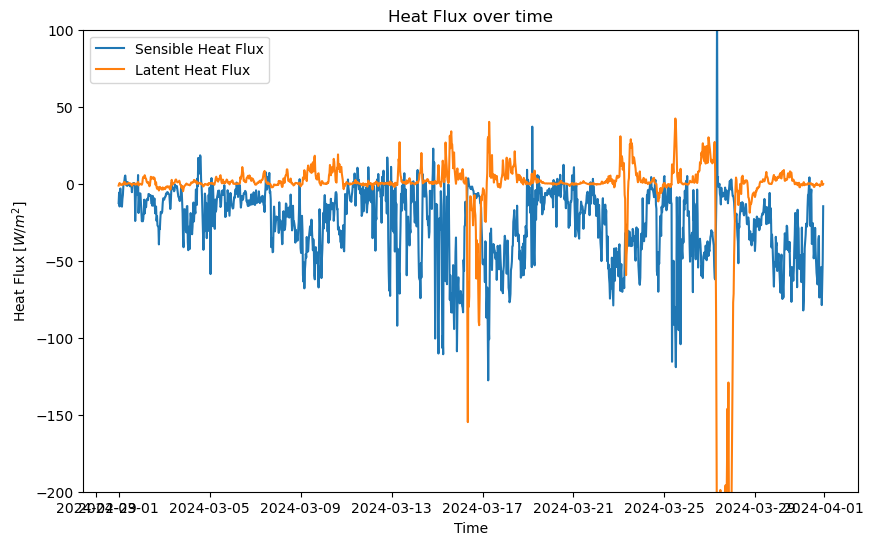

In [13]:
""" CHECK HEATFLUX QUICKLY WITH AVERAGING INTERVAL FOM MRD"""
df_heatflux=check_heat_flux(fastdata_rot, '30s', plot=True)
df_heatflux=check_heat_flux(fastdata_rot, '10min', plot=True)